# **EDA - 1**

 About - Dataset:

 Here is the dataset link: Bike Details Dataset

 The dataset provided focuses on used bikes, capturing various attributes to analyze the second-hand bike
market. This dataset helps understand factors influencing resale prices, usage patterns, and market trends for
used bikes.

 Title: Bike Details Dataset

 Source:

 The dataset is available on Kaggle, simulating data commonly observed in real-world online bike resale
platforms.

 Description:

 The dataset comprises 1061 records of used bike listings. These records include details about the bike's brand
and model, selling price, kilometers driven, ownership history, and other attributes. It is particularly useful for
resale value prediction, market analysis, and understanding buyer preferences.
 The dataset consists of 7 features, combining both numeric and categorical data, offering a comprehensive
view of the second-hand bike market.

 Title: Bike Details Dataset

 =name: Brand and model name of the bike (Categorical, e.g., "Royal Enfield Classic 350", "Honda Dio")
 selling_price: Listed selling price in INR (Numeric, e.g., 175000, 45000)
 year: Manufacturing year of the bike (Numeric, e.g., 2019, 2015)
 seller_type: Seller category, either "Individual" or "Dealer" (Categorical)
 owner: Ownership history, e.g., "1st owner", "2nd owner" (Categorical)
 km_driven: Total kilometers driven (Numeric, in km, e.g., 12000, 23000)
 ex_showroom_price: Original showroom price in INR (Numeric, e.g., 148114.0, 89643.0, etc,.).
 Java + DSA
 Pwskills

# **Questions**:

Q1. What is the range of selling prices in the dataset

Q2. What is the median selling price for bikes in the dataset

 What is the most common seller type

 Q4. How many bikes have driven more than 50,000 kilometers

 Q5. What is the average km_driven value for each ownership type

 Q6. What proportion of bikes are from the year 2015 or older

 Q7. What is the trend of missing values across the dataset

 Q8. What is the highest ex_showroom_price recorded, and for which bike

 Q9. What is the total number of bikes listed by each seller type

 Q10. What is the relationship between selling_price and km_driven for first-owner bikes

 Q11. Identify and remove outliers in the km_driven column using the IQR method
 Q12. Perform a bivariate analysis to visualize the relationship between year and selling_price

 Q13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing
year)

Q14. Which bike names are priced significantly above the average price for their manufacturing year

Q15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

In [6]:
# Load & preprocess (run this first)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

PATH = "/content/BIKE DETAILS.csv"   # change if different
df = pd.read_csv(PATH)
df.columns = [c.strip() for c in df.columns]

# Ensure numeric columns
for col in ['selling_price','year','km_driven','ex_showroom_price']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Normalize categorical fields
if 'seller_type' in df.columns:
    df['seller_type'] = df['seller_type'].astype(str).str.strip().str.title()
if 'owner' in df.columns:
    df['owner'] = df['owner'].astype(str).str.strip().str.lower().replace({
        'first owner':'1st owner','1 owner':'1st owner','1st':'1st owner'
    })

print("Loaded:", df.shape)
df.head()

Loaded: (1061, 7)


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [7]:
# Q1: What is the range of selling prices in the dataset
min_price = df['selling_price'].min()
max_price = df['selling_price'].max()
print(f"Q1 — Selling price range: min = {min_price}, max = {max_price}")


Q1 — Selling price range: min = 5000, max = 760000


In [9]:
# Q2: What is the median selling price for bikes in the dataset
median_price = df['selling_price'].median()
print(f"Q2 — Median selling_price = {median_price}")


Q2 — Median selling_price = 45000.0


In [10]:
# Q3: What is the most common seller type
most_common_seller = df['seller_type'].mode().iloc[0] if 'seller_type' in df.columns else None
print(f"Q3 — Most common seller_type = {most_common_seller}")


Q3 — Most common seller_type = Individual


In [11]:
# Q4: How many bikes have driven more than 50,000 kilometers
count_over_50k = df[df['km_driven'] > 50000].shape[0]
print(f"Q4 — Number of bikes with km_driven > 50,000: {count_over_50k}")


Q4 — Number of bikes with km_driven > 50,000: 170


In [12]:
# Q5: What is the average km_driven value for each ownership type
avg_km_by_owner = df.groupby('owner', dropna=False)['km_driven'].mean().reset_index().rename(columns={'km_driven':'avg_km_driven'})
print("Q5 — Average km_driven by owner:")
display(avg_km_by_owner)


Q5 — Average km_driven by owner:


,owner,avg_km_driven
0,1st owner,32816.583333
1,2nd owner,39288.991870
2,3rd owner,33292.181818
3,4th owner,311500.000000


In [13]:
# Q6: What proportion of bikes are from the year 2015 or older
total = len(df)
count_2015_or_older = df[df['year'] <= 2015].shape[0]
prop = count_2015_or_older / total if total>0 else np.nan
print(f"Q6 — {count_2015_or_older} out of {total} bikes are from 2015 or older ({prop:.2%})")



Q6 — 601 out of 1061 bikes are from 2015 or older (56.64%)


Q7 — Missing values count by column:
ex_showroom_price    435
selling_price          0
name                   0
year                   0
seller_type            0
owner                  0
km_driven              0
dtype: int64


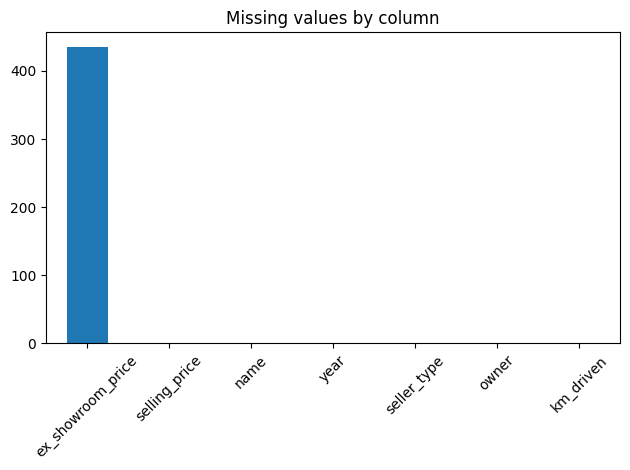

In [14]:
# Q7: What is the trend of missing values across the dataset
missing_counts = df.isnull().sum().sort_values(ascending=False)
print("Q7 — Missing values count by column:")
print(missing_counts)
# Optional bar plot
missing_counts.plot(kind='bar', title='Missing values by column', rot=45)
plt.tight_layout()
plt.show()


In [15]:
# Q8: What is the highest ex_showroom_price recorded, and for which bike
max_ex = df['ex_showroom_price'].max()
rows = df[df['ex_showroom_price'] == max_ex][['name','year','ex_showroom_price','selling_price']]
print(f"Q8 — Highest ex_showroom_price = {max_ex}")
display(rows)


Q8 — Highest ex_showroom_price = 1278000.0


,name,year,ex_showroom_price,selling_price
134,Harley-Davidson Street Bob,2013,1278000.0,750000


In [16]:
# Q9: What is the total number of bikes listed by each seller type
counts_by_seller = df['seller_type'].value_counts(dropna=False).reset_index().rename(columns={'index':'seller_type','seller_type':'count'})
print("Q9 — Counts by seller_type:")
display(counts_by_seller)


Q9 — Counts by seller_type:


,count,count
0,Individual,1055
1,Dealer,6


Q10 — Pearson correlation (selling_price vs km_driven) for first-owner bikes = -0.2435


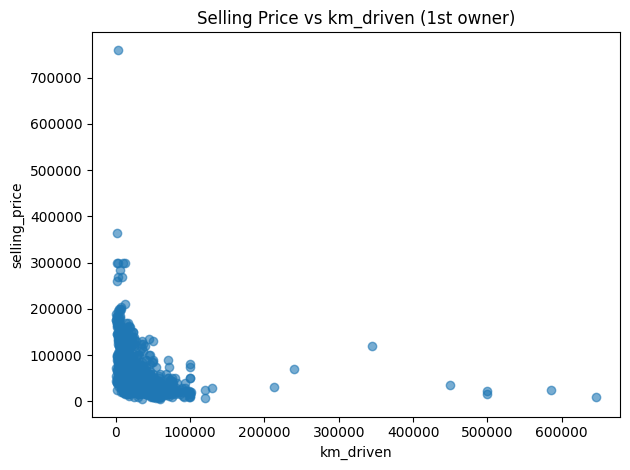

In [17]:
# Q10: Relationship between selling_price and km_driven for first-owner bikes
first_owner = df[df['owner'].str.contains('1st', na=False)]
corr = first_owner[['selling_price','km_driven']].corr().loc['selling_price','km_driven']
print(f"Q10 — Pearson correlation (selling_price vs km_driven) for first-owner bikes = {corr:.4f}")

# Scatter plot
plt.scatter(first_owner['km_driven'], first_owner['selling_price'], alpha=0.6)
plt.xlabel('km_driven'); plt.ylabel('selling_price')
plt.title('Selling Price vs km_driven (1st owner)')
plt.tight_layout()
plt.show()


In [30]:

# Q11: Identify and remove outliers in the km_driven column using the IQR method
km = df['km_driven'].dropna()
Q1 = km.quantile(0.25)
Q3 = km.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers_mask = (df['km_driven'] < lower) | (df['km_driven'] > upper)
outliers = df[outliers_mask]
cleaned = df[~outliers_mask].copy()

print(f"Q11 — IQR: Q1={Q1}, Q3={Q3}, IQR={IQR}")
print(f"Lower fence={lower}, Upper fence={upper}")
print(f"Number of outliers detected in km_driven = {outliers.shape[0]}")
print("Sample outliers:")
display(outliers.head())

# Save cleaned version (optional)
cleaned.to_csv("/content/BIKE_DETAILS_no_km_outliers.csv", index=False)
print("Cleaned file saved to /content/BIKE_DETAILS_no_km_outliers.csv")

Q11 — IQR: Q1=13500.0, Q3=43000.0, IQR=29500.0
Lower fence=-30750.0, Upper fence=87250.0
Number of outliers detected in km_driven = 39
Sample outliers:


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
91,Honda Activa [2000-2015],22989,2012,Individual,1st owner,500000,50267.0
93,Suzuki GS150R,30000,2010,Individual,1st owner,130000,70851.0
115,Hero Honda Passion Plus,7500,2004,Individual,1st owner,120000,NaN
135,Hero Honda CBZ extreme,20000,2007,Individual,1st owner,90000,NaN
154,Hero Xtreme Sports,22000,2014,Individual,1st owner,99000,78350.0


Cleaned file saved to /content/BIKE_DETAILS_no_km_outliers.csv


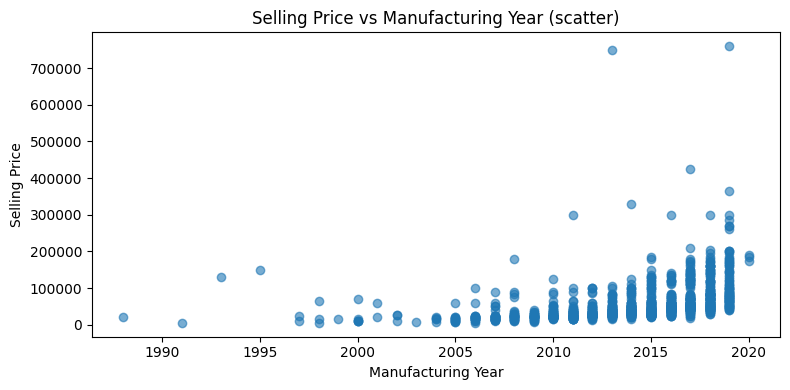

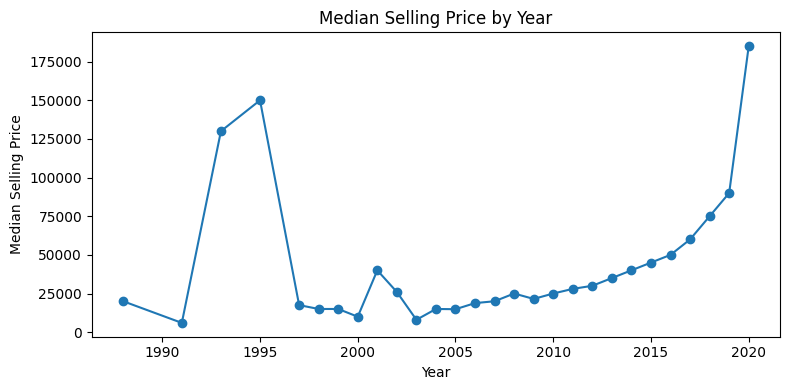

In [21]:
# Q12: Bivariate analysis - visualize relationship between year and selling_price
plt.figure(figsize=(8,4))
plt.scatter(df['year'], df['selling_price'], alpha=0.6)
plt.xlabel('Manufacturing Year'); plt.ylabel('Selling Price')
plt.title('Selling Price vs Manufacturing Year (scatter)')
plt.tight_layout()
plt.show()

# Median selling_price per year
median_by_year = df.groupby('year')['selling_price'].median().reset_index().sort_values('year')
plt.figure(figsize=(8,4))
plt.plot(median_by_year['year'], median_by_year['selling_price'], marker='o')
plt.xlabel('Year'); plt.ylabel('Median Selling Price')
plt.title('Median Selling Price by Year')
plt.tight_layout()
plt.show()


In [22]:
# Q13: Average depreciation in selling price based on bike's age
CURRENT_YEAR = 2025  # adjust if needed
df['age_years'] = CURRENT_YEAR - df['year']
df['abs_depreciation'] = df['ex_showroom_price'] - df['selling_price']
df['pct_depreciation'] = (df['abs_depreciation'] / df['ex_showroom_price']) * 100

dep_by_age = df.groupby('age_years').agg(
    avg_abs_dep = ('abs_depreciation','mean'),
    avg_pct_dep = ('pct_depreciation','mean'),
    count = ('selling_price','count')
).reset_index().sort_values('age_years')

print("Q13 — Average depreciation by age (years):")
display(dep_by_age)


Q13 — Average depreciation by age (years):


,age_years,avg_abs_dep,avg_pct_dep,count
0,5,-34260.000000,-21.998202,3
1,6,2954.562500,2.691909,86
2,7,13023.194805,13.778047,131
3,8,22306.082353,23.145691,133
4,9,28328.190476,33.556550,107
5,10,28013.275000,35.941873,100
6,11,34505.606061,39.232589,91
7,12,43086.886792,46.811617,73
8,13,37317.648649,52.973641,70
9,14,47102.666667,58.773457,61


In [23]:
# Q14: Which bike names are priced significantly above the average price for their manufacturing year
# Define "significantly above" as > year_mean + 1.5 * year_std
stats = df.groupby('year')['selling_price'].agg(['mean','std']).reset_index().rename(columns={'mean':'year_mean','std':'year_std'})
df_stats = df.merge(stats, on='year', how='left')
df_stats['threshold'] = df_stats['year_mean'] + 1.5 * df_stats['year_std'].fillna(0)
significantly_above = df_stats[df_stats['selling_price'] > df_stats['threshold']][['name','year','selling_price','year_mean','year_std','threshold']]
print("Q14 — Bikes priced significantly above their year's average:")
display(significantly_above.sort_values(['year','selling_price'], ascending=[True,False]).head(50))


Q14 — Bikes priced significantly above their year's average:


,name,year,selling_price,year_mean,year_std,threshold
306,Yamaha Rx,2000,70000,20833.333333,24169.540059,57087.643422
889,Royal Enfield Thunderbird 350,2005,59000,16978.571429,12804.096614,36184.716350
776,Royal Enfield Electra 5 S,2006,99000,23380.000000,20824.166123,54616.249185
408,Royal Enfield Thunderbird 350,2006,60000,23380.000000,20824.166123,54616.249185
224,Royal Enfield Bullet 350 [2007-2011],2007,90000,24927.586207,17637.073303,51383.196161
181,Royal Enfield Electra 5 S,2007,60000,24927.586207,17637.073303,51383.196161
7,Royal Enfield Bullet 350 [2007-2011],2008,180000,34289.285714,35197.257251,87085.171591
68,Royal Enfield Electra 4 S,2008,90000,34289.285714,35197.257251,87085.171591
958,Hero Honda CBZ extreme,2009,40000,22267.857143,8009.811279,34282.574061
572,Bajaj Pulsar 180,2009,35000,22267.857143,8009.811279,34282.574061


Q15 — Correlation matrix:


,selling_price,year,km_driven,ex_showroom_price
selling_price,1.000000,0.402188,-0.212937,0.918583
year,0.402188,1.000000,-0.288675,0.126378
km_driven,-0.212937,-0.288675,1.000000,-0.122011
ex_showroom_price,0.918583,0.126378,-0.122011,1.000000


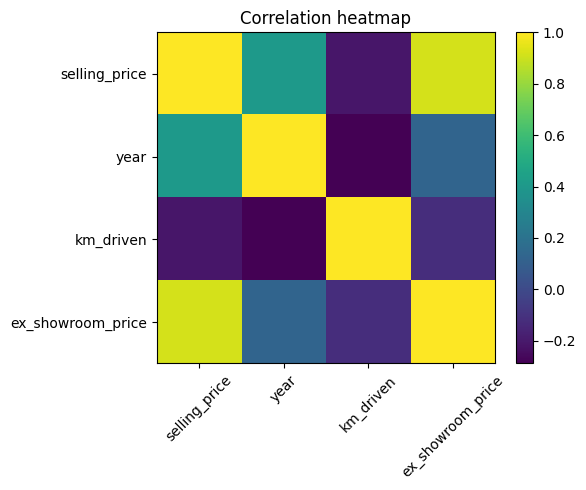

In [24]:
# Q15: Correlation matrix for numeric columns and visualize it using a heatmap
num_cols = ['selling_price','year','km_driven','ex_showroom_price']
corr_matrix = df[num_cols].corr()
print("Q15 — Correlation matrix:")
display(corr_matrix)

# Heatmap (matplotlib)
plt.figure(figsize=(6,5))
plt.imshow(corr_matrix.values, aspect='auto')
plt.colorbar()
plt.xticks(range(len(num_cols)), num_cols, rotation=45)
plt.yticks(range(len(num_cols)), num_cols)
plt.title('Correlation heatmap')
plt.tight_layout()
plt.show()


## **EDA - 2**

# **About - Dataset:**

 Here is the dataset link:Car Sales

 The dataset provided focuses on used car sales, capturing various attributes to analyze the second-hand car
market. This dataset provides insights into factors affecting resale value, trends in the used car industry, and
consumer behavior.

# **Title: Car Sale Dataset**

# Source:

 The dataset is available on Kaggle, representing data commonly seen in online car resale platforms.

# Description:

 The dataset contains details about used cars listed for sale, such as brand, model, selling price, kilometers
driven, fuel type, and transmission type. This information is valuable for predictive modeling, market analysis,
and understanding customer preferences.

# Features:

 Car_id: A unique identifier for each car in the dataset, helping to track individual car entries
 Date: The date when the car sale transaction took place, formatted as YYYY-MM-DD
 Customer Name: The name of the customer who purchased the car, represented as a string
 Gender: The gender of the customer, categorized as "Male" or "Female.
 Annual Income: The customer's annual income in US dollars, represented as a numeric value
 Dealer_Name: The name of the dealership selling the car, represented as a string
 Company: The manufacturer or brand name of the car, such as "Toyota," "Ford," etc
 Model: The specific model name of the car, such as "Corolla," "Civic," etc
 Engine: The engine type of the car, such as "V6," "I4," etc
 Price ($): The selling price of the car in US dollars
 Transmission: The type of transmission in the car, either "Manual" or "Automatic.
 Color: The color of the car, represented as a string (e.g., "Red," "Blue")
 Dealer_No: A unique identifier for each car dealer in the dataset
 Body Style: The body style of the car, such as "Sedan," "SUV," etc
 Phone: The phone number of the customer who purchased the car
 Dealer_Region: The geographical region of the car dealer, such as "North," "South," etc.

# **Questions: **

Q1. What is the average selling price of cars for each dealer, and how does it compare across different dealers

 Q2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
trends

 Q3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges
compare

 Q4. What is the distribution of car prices across different regions

 Q5. What is the distribution of cars based on body styles

 Q6. How does the average selling price of cars vary by customer gender and annual income

 Q7. What is the distribution of car prices by region, and how does the number of cars sold vary by region

 Q8. How does the average car price differ between cars with different engine sizes

 Q9. How do car prices vary based on the customer’s annual income bracket

 Q10. What are the top 5 car models with the highest number of sales, and how does their price distribution look

Q11. How does car price vary with engine size across different car colors, and which colors have the highest price
variation

Q12. Is there any seasonal trend in car sales based on the date of sale

Q13. How does the car price distribution change when considering different combinations of body style and
transmission type

Q14. What is the correlation between car price, engine size, and annual income of customers, and how do these
features interact

Q15. How does the average car price vary across different car models and engine types?

In [39]:
# Load & preprocess (run this first)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

PATH = "/content/Car Sale.csv"   # change if different
df = pd.read_csv(PATH)

# Clean column names
df.columns = [c.strip() for c in df.columns]

# Show columns and head
print("Loaded:", df.shape)
display(df.head())

# Parse dates
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Normalize numeric columns (Price, Annual Income)
price_col = None
for c in df.columns:
    if c.lower().startswith('price'):
        price_col = c
        break

if price_col is None:
    raise ValueError("Price column not found. Rename your price column to start with 'Price'.")

df[price_col] = pd.to_numeric(df[price_col], errors='coerce')

# Annual Income
if 'Annual Income' in df.columns:
    df['Annual Income'] = pd.to_numeric(df['Annual Income'], errors='coerce')

# Remove engine_size_parsed as it was based on numerical extraction which is not applicable
if 'engine_size_parsed' in df.columns:
    df = df.drop(columns=['engine_size_parsed'])

# Standardize categorical columns (including 'Engine')
for c in ['Company','Model','Transmission','Body Style','Dealer_Region','Dealer_Name','Gender','Color', 'Engine']:
    if c in df.columns:
        df[c] = df[c].astype(str).str.strip()

# Show processed info
print("Price column used:", price_col)
print("Numeric summary:")
display(df[[price_col, 'Annual Income']].describe())

Loaded: (23906, 16)


,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


Price column used: Price ($)
Numeric summary:


,Price ($),Annual Income
count,23906.000000,2.390600e+04
mean,28090.247846,8.308403e+05
std,14788.687608,7.200064e+05
min,1200.000000,1.008000e+04
25%,18001.000000,3.860000e+05
50%,23000.000000,7.350000e+05
75%,34000.000000,1.175750e+06
max,85800.000000,1.120000e+07


Q1 — Average selling price per dealer (top 20):


,dealer,avg_price
27,U-Haul CO,28769.919006
5,Classic Chevy,28602.014446
19,Rabun Used Car Sales,28527.536177
11,Iceberg Rentals,28522.958533
8,Enterprise Rent A Car,28312.580800
23,Scrivener Performance Engineering,28297.371589
9,Gartner Buick Hyundai Saab,28247.621019
22,Saab-Belle Dodge,28190.139888
2,Capitol KIA,28189.703822
20,Race Car Help,28163.372706


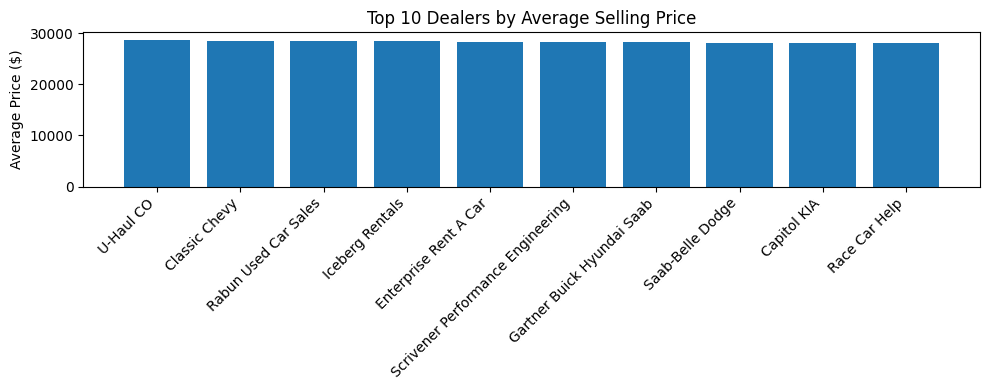

In [29]:
# Q1. Average selling price of cars for each dealer, and comparison across dealers
# (Dealer_Name assumed)
dealer_col = 'Dealer_Name' if 'Dealer_Name' in df.columns else None
price = price_col

if dealer_col:
    avg_price_by_dealer = df.groupby(dealer_col)[price].mean().reset_index().rename(columns={price:'avg_price',dealer_col:'dealer'})
    avg_price_by_dealer = avg_price_by_dealer.sort_values('avg_price', ascending=False)
    print("Q1 — Average selling price per dealer (top 20):")
    display(avg_price_by_dealer.head(20))
    # Bar plot top 10 dealers
    plt.figure(figsize=(10,4))
    top10 = avg_price_by_dealer.head(10)
    plt.bar(top10['dealer'], top10['avg_price'])
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Average Price ($)')
    plt.title('Top 10 Dealers by Average Selling Price')
    plt.tight_layout()
    plt.show()
else:
    print("Dealer_Name column not found in dataset.")

In [30]:
# Q2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends
# Calculate the standard deviation of prices for each company
price_variation_by_company = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)

print("Q2 — Car brand with the highest variation in prices:")
display(price_variation_by_company.head())

# To further interpret, let's also look at the mean price for these companies
mean_price_by_company = df.groupby('Company')['Price ($)'].mean().loc[price_variation_by_company.head().index]
print("Mean price for the companies with highest variation:")
display(mean_price_by_company)

Q2 — Car brand with the highest variation in prices:


,Price ($)
Company,
Lincoln,19658.050211
Saab,19653.740089
Cadillac,19517.120220
Plymouth,19065.997338
Lexus,17852.923492


Mean price for the companies with highest variation:


,Price ($)
Company,
Lincoln,31407.036585
Saab,36516.338095
Cadillac,40972.093558
Plymouth,29404.980551
Lexus,34024.567332


Q3 — Distribution of car prices by transmission type:


,count,mean,std,min,25%,50%,75%,max
Transmission,,,,,,,,
Auto,12571.0,28248.525972,13747.070597,1200.0,19000.0,24000.0,35500.0,75700.0
Manual,11335.0,27914.710631,15862.871978,1700.0,17000.0,22001.0,34000.0,85800.0


<Figure size 800x600 with 0 Axes>

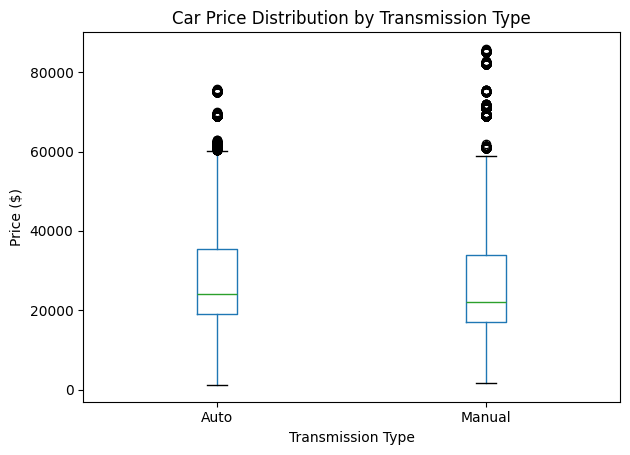

In [31]:
# Q3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare
price_by_transmission = df.groupby('Transmission')['Price ($)'].describe()
print("Q3 — Distribution of car prices by transmission type:")
display(price_by_transmission)

# Visualize with box plots
plt.figure(figsize=(8, 6))
df.boxplot(column='Price ($)', by='Transmission', grid=False)
plt.title('Car Price Distribution by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price ($)')
plt.suptitle('') # Suppress the default title from boxplot
plt.tight_layout()
plt.show()

Q4 — Distribution of car prices by dealer region:


,count,mean,std,min,25%,50%,75%,max
Dealer_Region,,,,,,,,
Aurora,3130.0,28334.626837,15026.207252,9000.0,18001.0,23000.0,35000.0,85800.0
Austin,4135.0,28341.603628,14903.884549,9000.0,18001.0,23801.0,35001.0,85601.0
Greenville,3128.0,28180.819054,15101.538328,1200.0,18001.0,22500.0,34500.0,85200.0
Janesville,3821.0,27833.350955,14344.995638,4300.0,18001.0,23000.0,34000.0,85400.0
Middletown,3128.0,27856.338875,14619.842395,1700.0,18000.0,22750.0,34000.0,85300.0
Pasco,3131.0,28119.039923,14659.315941,9000.0,18500.5,23000.0,34000.0,85600.0
Scottsdale,3433.0,27954.958928,14902.916820,1450.0,18000.0,22600.0,33500.0,85001.0


<Figure size 1200x600 with 0 Axes>

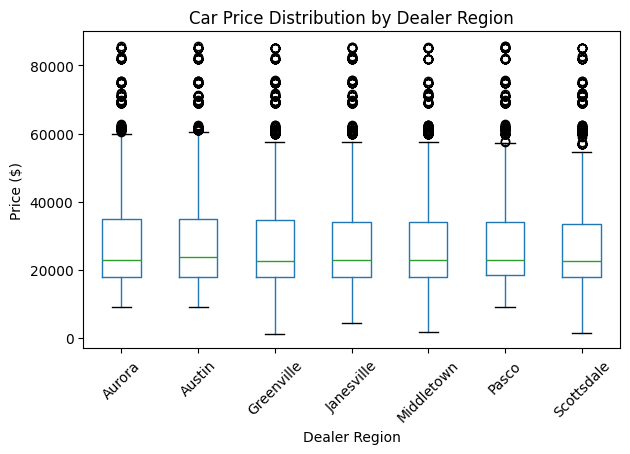

In [32]:
# Q4. What is the distribution of car prices across different regions
price_by_region = df.groupby('Dealer_Region')['Price ($)'].describe()
print("Q4 — Distribution of car prices by dealer region:")
display(price_by_region)

# Visualize with box plots
plt.figure(figsize=(12, 6))
df.boxplot(column='Price ($)', by='Dealer_Region', rot=45, grid=False)
plt.title('Car Price Distribution by Dealer Region')
plt.xlabel('Dealer Region')
plt.ylabel('Price ($)')
plt.suptitle('') # Suppress the default title from boxplot
plt.tight_layout()
plt.show()

Q5 — Distribution of cars by body style:


,count
Body Style,
SUV,6374
Hatchback,6128
Sedan,4488
Passenger,3945
Hardtop,2971


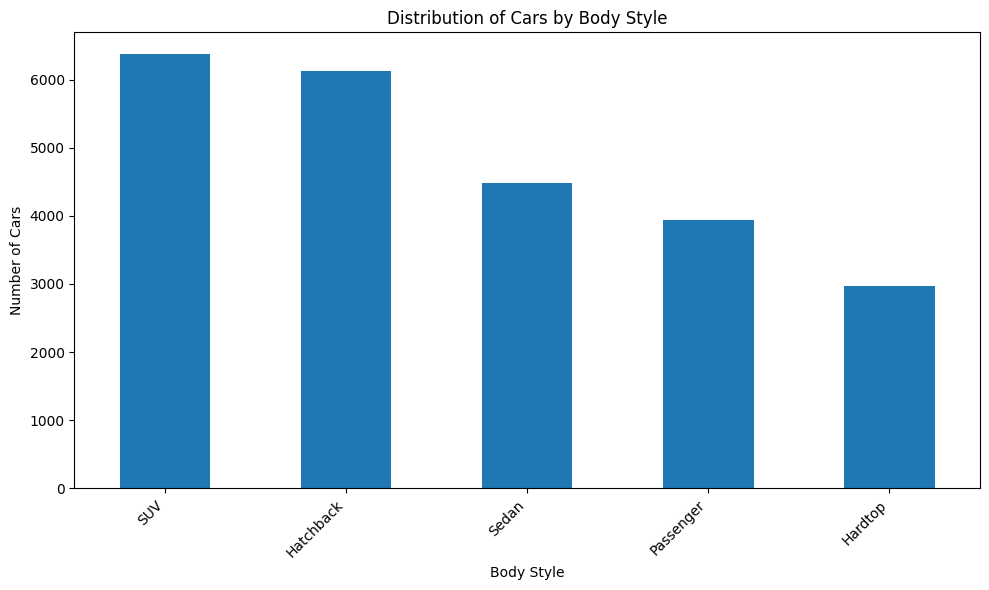

In [33]:
# Q5. What is the distribution of cars based on body styles
body_style_distribution = df['Body Style'].value_counts()
print("Q5 — Distribution of cars by body style:")
display(body_style_distribution)

# Visualize with a bar chart
plt.figure(figsize=(10, 6))
body_style_distribution.plot(kind='bar')
plt.title('Distribution of Cars by Body Style')
plt.xlabel('Body Style')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Q6 — Average selling price by customer gender and annual income (top 20 rows):


,Gender,Annual Income,Price ($)
0,Female,13500,28132.038732
1,Female,106000,46001.000000
2,Female,121000,20000.000000
3,Female,190000,19001.000000
4,Female,211000,51000.000000
5,Female,238000,22001.000000
6,Female,240000,39000.000000
7,Female,253000,16000.000000
8,Female,255000,43000.000000
9,Female,256000,16000.000000


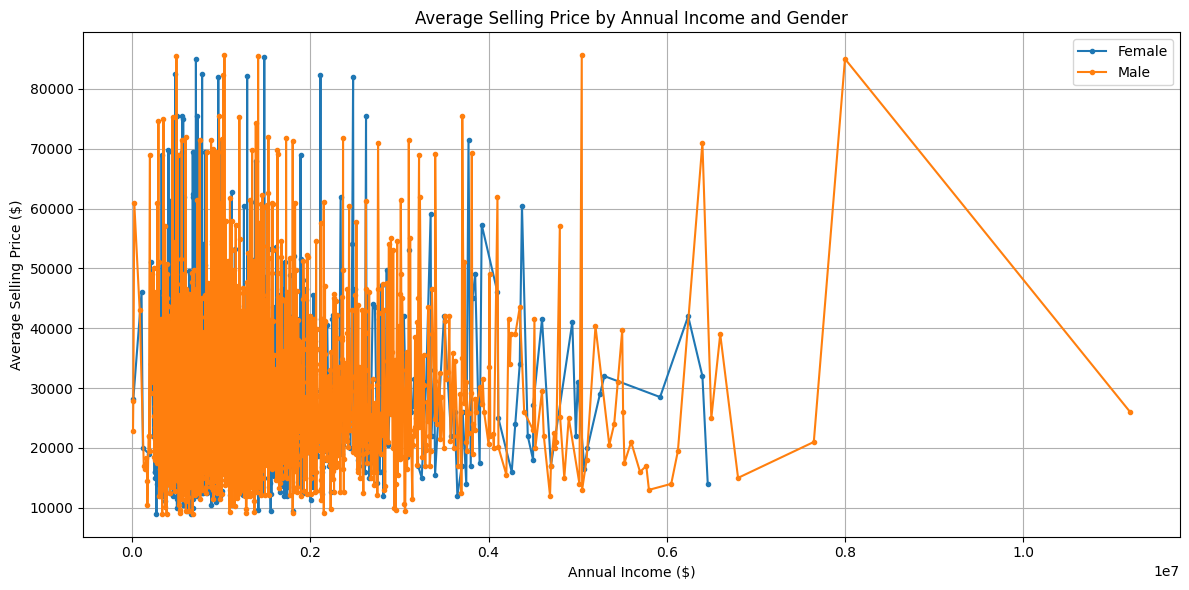

In [34]:
# Q6. How does the average selling price of cars vary by customer gender and annual income
avg_price_by_gender_income = df.groupby(['Gender', 'Annual Income'])['Price ($)'].mean().reset_index()
print("Q6 — Average selling price by customer gender and annual income (top 20 rows):")
display(avg_price_by_gender_income.head(20))

# To visualize, we can plot average price by income for each gender
plt.figure(figsize=(12, 6))
for gender, data in df.groupby('Gender'):
    # Group by annual income and get the mean price
    income_price = data.groupby('Annual Income')['Price ($)'].mean().reset_index()
    plt.plot(income_price['Annual Income'], income_price['Price ($)'], label=gender, marker='.')

plt.xlabel('Annual Income ($)')
plt.ylabel('Average Selling Price ($)')
plt.title('Average Selling Price by Annual Income and Gender')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Q7 — Distribution of car prices by dealer region (descriptive statistics):


,count,mean,std,min,25%,50%,75%,max
Dealer_Region,,,,,,,,
Aurora,3130.0,28334.626837,15026.207252,9000.0,18001.0,23000.0,35000.0,85800.0
Austin,4135.0,28341.603628,14903.884549,9000.0,18001.0,23801.0,35001.0,85601.0
Greenville,3128.0,28180.819054,15101.538328,1200.0,18001.0,22500.0,34500.0,85200.0
Janesville,3821.0,27833.350955,14344.995638,4300.0,18001.0,23000.0,34000.0,85400.0
Middletown,3128.0,27856.338875,14619.842395,1700.0,18000.0,22750.0,34000.0,85300.0
Pasco,3131.0,28119.039923,14659.315941,9000.0,18500.5,23000.0,34000.0,85600.0
Scottsdale,3433.0,27954.958928,14902.916820,1450.0,18000.0,22600.0,33500.0,85001.0



Q7 — Number of cars sold by dealer region:


,Dealer_Region,Number of Cars Sold
0,Austin,4135
1,Janesville,3821
2,Scottsdale,3433
3,Pasco,3131
4,Aurora,3130
5,Greenville,3128
6,Middletown,3128


<Figure size 1200x600 with 0 Axes>

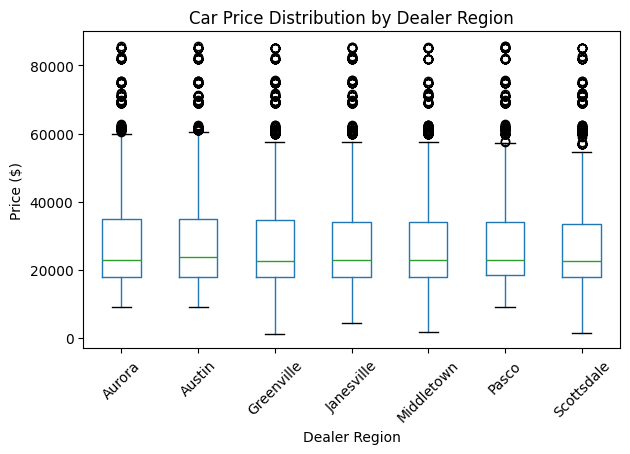

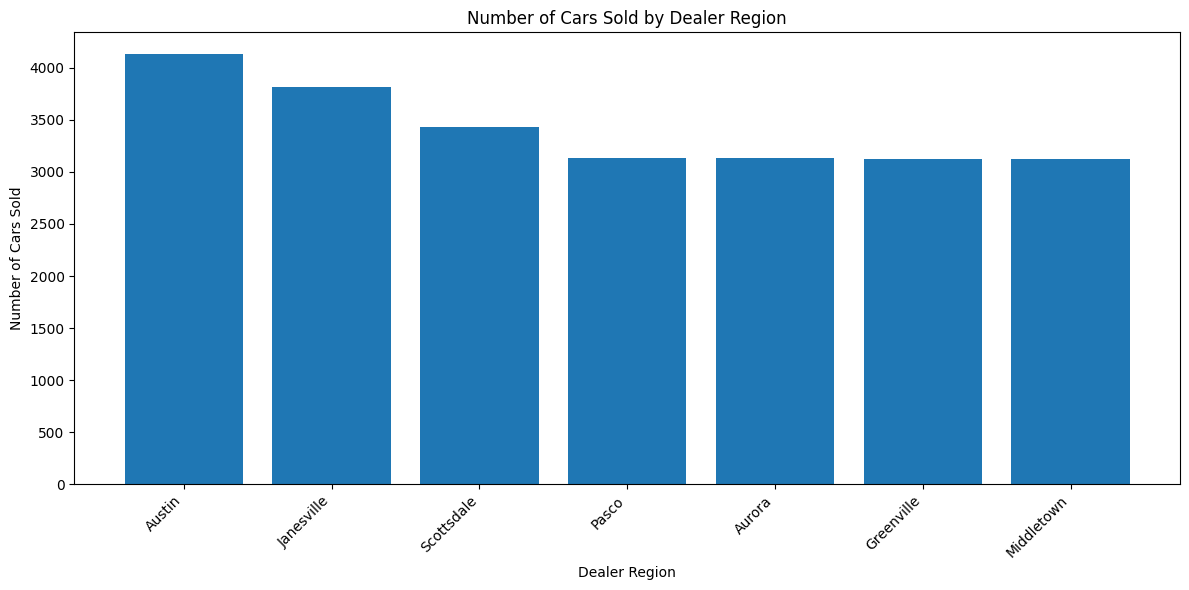

In [36]:
# Q7. What is the distribution of car prices by region, and how does the number of cars sold vary by region

# Distribution of car prices by region (descriptive statistics)
price_dist_by_region = df.groupby('Dealer_Region')['Price ($)'].describe()
print("Q7 — Distribution of car prices by dealer region (descriptive statistics):")
display(price_dist_by_region)

# Number of cars sold by region
cars_sold_by_region = df['Dealer_Region'].value_counts().reset_index()
cars_sold_by_region.columns = ['Dealer_Region', 'Number of Cars Sold']
print("\nQ7 — Number of cars sold by dealer region:")
display(cars_sold_by_region)

# Visualize price distribution with box plots
plt.figure(figsize=(12, 6))
df.boxplot(column='Price ($)', by='Dealer_Region', rot=45, grid=False)
plt.title('Car Price Distribution by Dealer Region')
plt.xlabel('Dealer Region')
plt.ylabel('Price ($)')
plt.suptitle('') # Suppress the default title from boxplot
plt.tight_layout()
plt.show()

# Visualize number of cars sold by region with a bar chart
plt.figure(figsize=(12, 6))
plt.bar(cars_sold_by_region['Dealer_Region'], cars_sold_by_region['Number of Cars Sold'])
plt.title('Number of Cars Sold by Dealer Region')
plt.xlabel('Dealer Region')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Q8 — Average car price by engine type:


,Engine,Price ($)
0,DoubleÂ Overhead Camshaft,28248.525972
1,Overhead Camshaft,27914.710631


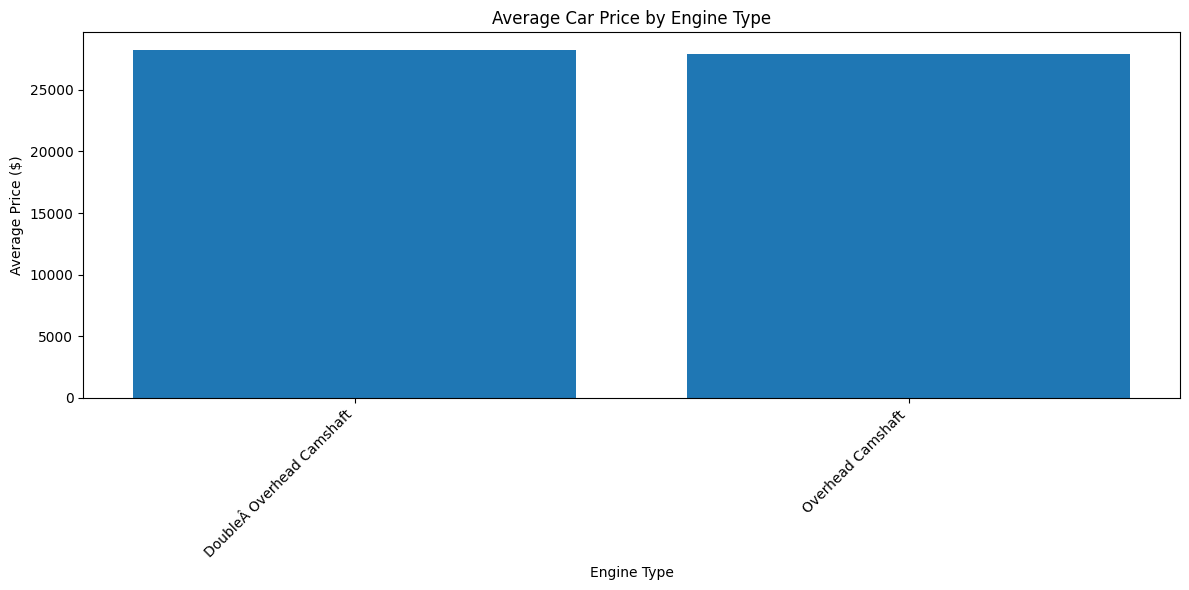

In [40]:
# Q8. How does the average car price differ between cars with different engine sizes (types)
avg_price_by_engine_type = df.groupby('Engine')['Price ($)'].mean().reset_index()
print("Q8 — Average car price by engine type:")
display(avg_price_by_engine_type.sort_values('Price ($)', ascending=False))

# Visualize with a bar chart
plt.figure(figsize=(12, 6))
plt.bar(avg_price_by_engine_type['Engine'], avg_price_by_engine_type['Price ($)'])
plt.xlabel('Engine Type')
plt.ylabel('Average Price ($)')
plt.title('Average Car Price by Engine Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [38]:
# Inspect unique values of 'Engine' column
print("Unique values in 'Engine' column:")
display(df['Engine'].value_counts().head(20)) # Display top 20 most frequent engine types

Unique values in 'Engine' column:


,count
Engine,
DoubleÂ Overhead Camshaft,12571
Overhead Camshaft,11335


Q9 — Average car price by annual income bracket:


/tmp/ipython-input-2798646316.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_income_bracket = df.groupby('Income_Bracket')['Price ($)'].mean().reset_index()


,Income_Bracket,Price ($)
0,<100k,27887.162813
1,100k-200k,19536.071429
2,200k-300k,29357.959732
3,300k-400k,28648.699842
4,400k-500k,28434.748086
5,500k-750k,27790.114017
6,750k-1M,28218.421195
7,1M-2M,28084.376832
8,2M-5M,28881.360644
9,>5M,29871.368421


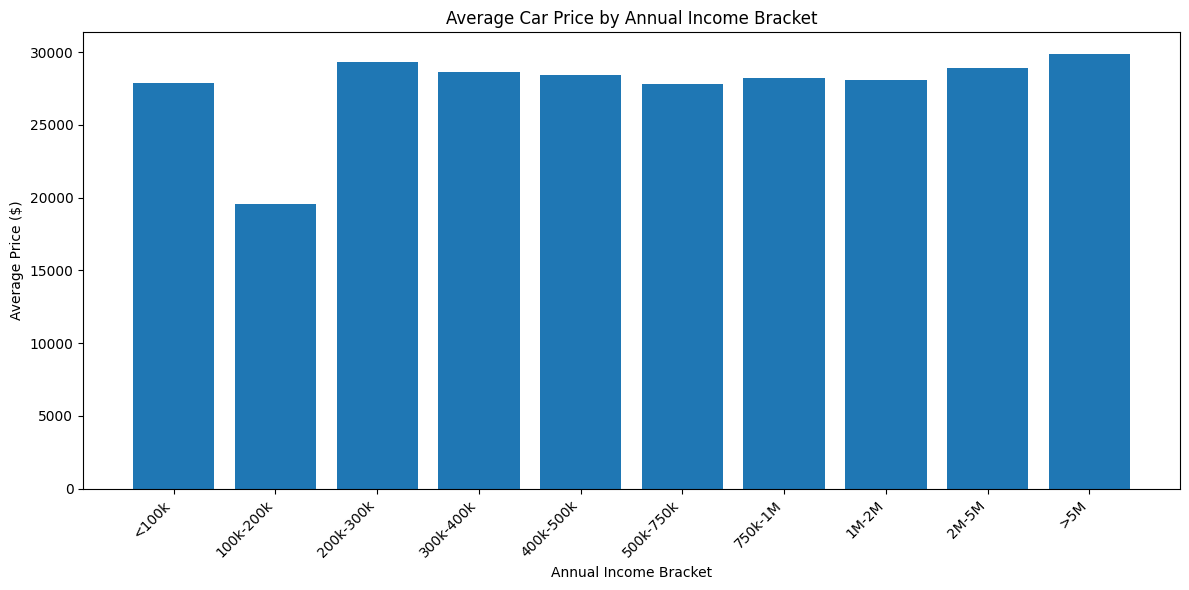

In [41]:
# Q9. How do car prices vary based on the customer’s annual income bracket
# Define income brackets (e.g., every $100,000 or custom bins)
income_bins = [0, 100000, 200000, 300000, 400000, 500000, 750000, 1000000, 2000000, 5000000, df['Annual Income'].max() + 1]
income_labels = ['<100k', '100k-200k', '200k-300k', '300k-400k', '400k-500k', '500k-750k', '750k-1M', '1M-2M', '2M-5M', '>5M']

df['Income_Bracket'] = pd.cut(df['Annual Income'], bins=income_bins, labels=income_labels, right=False)

avg_price_by_income_bracket = df.groupby('Income_Bracket')['Price ($)'].mean().reset_index()
print("Q9 — Average car price by annual income bracket:")
display(avg_price_by_income_bracket)

# Visualize with a bar chart
plt.figure(figsize=(12, 6))
plt.bar(avg_price_by_income_bracket['Income_Bracket'], avg_price_by_income_bracket['Price ($)'])
plt.xlabel('Annual Income Bracket')
plt.ylabel('Average Price ($)')
plt.title('Average Car Price by Annual Income Bracket')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Q10 — Top 5 car models by number of sales: ['Diamante', 'Prizm', 'Silhouette', 'Passat', 'Ram Pickup']

Price distribution for top 5 car models:


,count,mean,std,min,25%,50%,75%,max
Model,,,,,,,,
Diamante,418.0,22268.303828,9770.768958,12000.0,18000.0,19001.0,22000.0,49801.0
Passat,391.0,19600.728900,8218.521683,9000.0,12001.0,20000.0,27001.0,32501.0
Prizm,411.0,22838.457421,8012.531045,15000.0,16000.0,22000.0,25000.0,44700.0
Ram Pickup,383.0,27820.864230,13297.609534,16000.0,19000.0,21000.0,39300.0,57750.0
Silhouette,411.0,29858.513382,17940.571762,12000.0,14001.0,25000.0,34500.0,60750.0


<Figure size 1200x700 with 0 Axes>

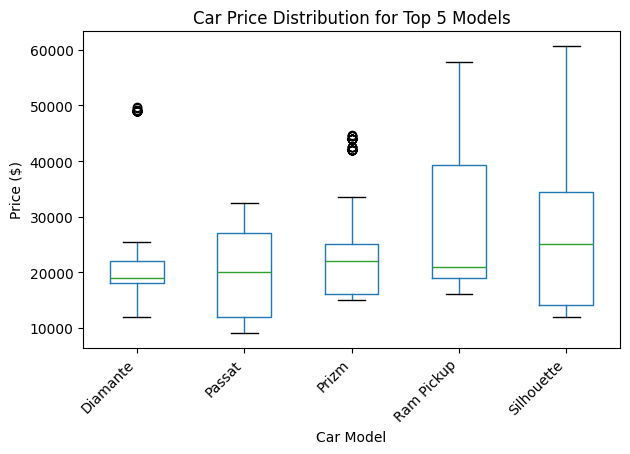

In [42]:
# Q10. What are the top 5 car models with the highest number of sales, and how does their price distribution look

# Get the top 5 car models by sales count
top_5_models = df['Model'].value_counts().head(5).index.tolist()
print(f"Q10 — Top 5 car models by number of sales: {top_5_models}")

# Filter the DataFrame for these top 5 models
df_top_5_models = df[df['Model'].isin(top_5_models)]

# Describe the price distribution for these models
price_dist_top_5 = df_top_5_models.groupby('Model')['Price ($)'].describe()
print("\nPrice distribution for top 5 car models:")
display(price_dist_top_5)

# Visualize price distribution using box plots
plt.figure(figsize=(12, 7))
df_top_5_models.boxplot(column='Price ($)', by='Model', grid=False)
plt.title('Car Price Distribution for Top 5 Models')
plt.xlabel('Car Model')
plt.ylabel('Price ($)')
plt.suptitle('') # Suppress the default title from boxplot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Q11 — Price variation by color and engine type (top 20):


,Color,Engine,mean,std,count
0,Black,DoubleÂ Overhead Camshaft,25766.451103,12418.674126,4172
1,Black,Overhead Camshaft,31732.967164,17457.405345,3685
2,Pale White,DoubleÂ Overhead Camshaft,30347.987460,14402.413401,5901
3,Pale White,Overhead Camshaft,24327.767694,13000.103061,5355
4,Red,DoubleÂ Overhead Camshaft,27434.392314,13499.354247,2498
5,Red,Overhead Camshaft,30153.405229,17346.642554,2295



Q11 — Colors with the highest overall price variation:


,Price ($)
Color,
Red,15519.360962
Black,15286.065976
Pale White,14077.346859


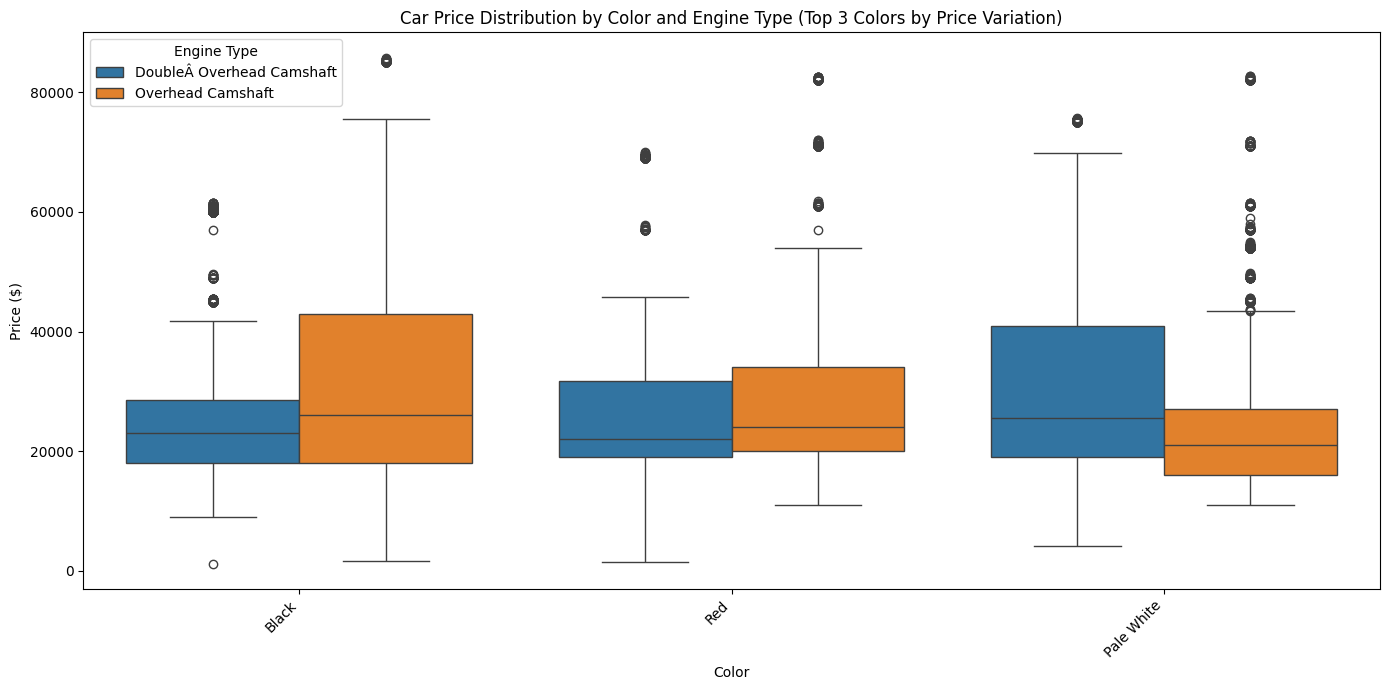

In [43]:
# Q11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?

# Group by Color and Engine type, then calculate mean and std of Price
price_variation_by_color_engine = df.groupby(['Color', 'Engine'])['Price ($)'].agg(['mean', 'std', 'count']).reset_index()
print("Q11 — Price variation by color and engine type (top 20):")
display(price_variation_by_color_engine.head(20))

# Identify colors with the highest price variation (overall, across engine types)
# First, calculate overall std dev per color
overall_price_std_by_color = df.groupby('Color')['Price ($)'].std().sort_values(ascending=False)
print("\nQ11 — Colors with the highest overall price variation:")
display(overall_price_std_by_color.head())

# For visualization, let's pick a few top colors and plot price vs engine type
# Since 'Engine' is categorical, we'll use box plots or bar plots for average price

# Let's visualize the top 3 colors by overall price variation
top_colors = overall_price_std_by_color.head(3).index.tolist()
df_top_colors = df[df['Color'].isin(top_colors)]

plt.figure(figsize=(14, 7))
import seaborn as sns
sns.boxplot(data=df_top_colors, x='Color', y='Price ($)', hue='Engine')
plt.title('Car Price Distribution by Color and Engine Type (Top 3 Colors by Price Variation)')
plt.xlabel('Color')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Engine Type')
plt.tight_layout()
plt.show()

Q12 — Car sales count by month:


,Sale_Month,Sales_Count
0,1,790
1,2,735
2,3,1535
3,4,1655
4,5,1895
5,6,1715
6,7,1725
7,8,1705
8,9,3305
9,10,1830


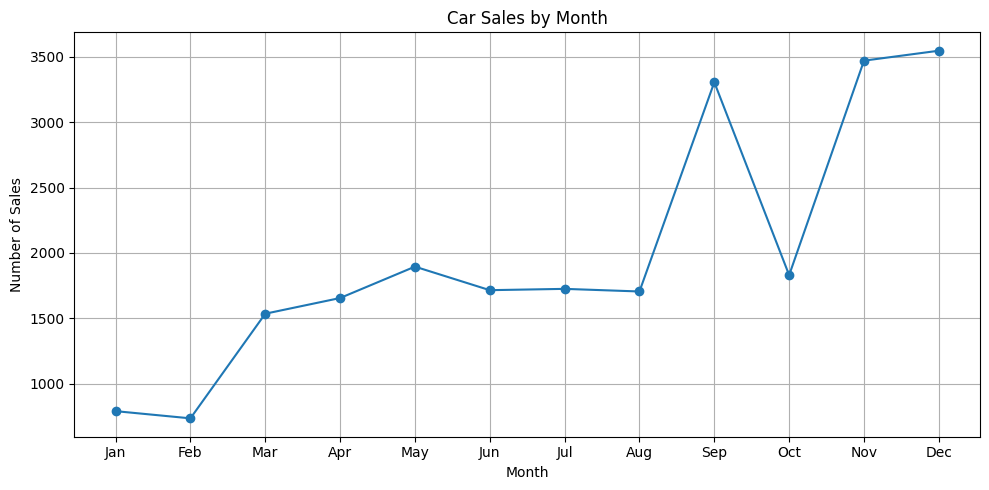


Q12 — Car sales count by day of week:


,Sale_DayOfWeek,Sales_Count
0,0,4000
1,1,4425
2,2,3250
3,3,1330
4,4,2651
5,5,4170
6,6,4080


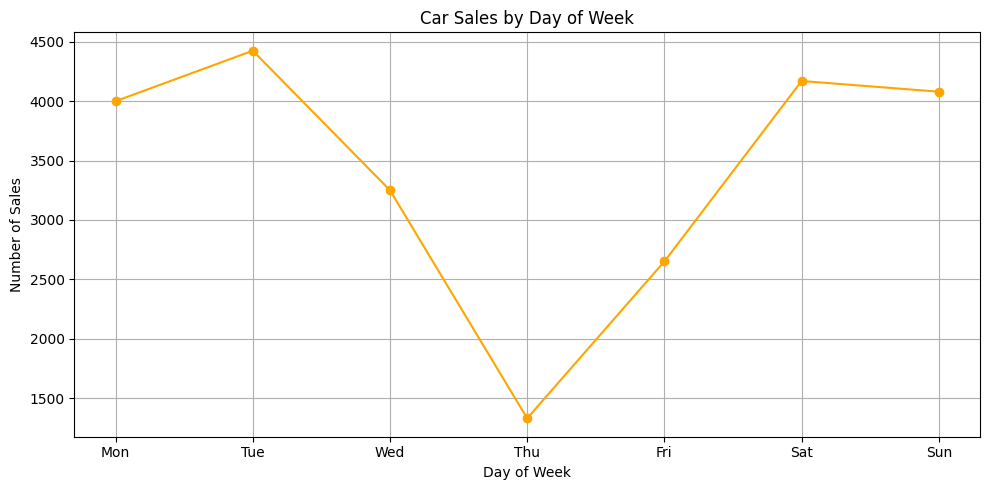

In [44]:
# Q12. Is there any seasonal trend in car sales based on the date of sale

# Extract month and day of week from the 'Date' column
df['Sale_Month'] = df['Date'].dt.month
df['Sale_DayOfWeek'] = df['Date'].dt.dayofweek # Monday=0, Sunday=6

# Sales trend by month
sales_by_month = df.groupby('Sale_Month').size().reset_index(name='Sales_Count')
print("Q12 — Car sales count by month:")
display(sales_by_month)

plt.figure(figsize=(10, 5))
plt.plot(sales_by_month['Sale_Month'], sales_by_month['Sales_Count'], marker='o')
plt.title('Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()
plt.show()

# Sales trend by day of week
sales_by_dayofweek = df.groupby('Sale_DayOfWeek').size().reset_index(name='Sales_Count')
print("\nQ12 — Car sales count by day of week:")
display(sales_by_dayofweek)

plt.figure(figsize=(10, 5))
plt.plot(sales_by_dayofweek['Sale_DayOfWeek'], sales_by_dayofweek['Sales_Count'], marker='o', color='orange')
plt.title('Car Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Sales')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)
plt.tight_layout()
plt.show()

Q13 — Price distribution by Body Style and Transmission Type:


count          mean           std      min      25%  \
Body Style Transmission                                                         
Hardtop    Auto          1408.0  31520.188210  13687.756740  12000.0  21001.0   
           Manual        1563.0  27016.943698  14072.501848  11000.0  17575.5   
Hatchback  Auto          3458.0  25910.544824  13144.014337   4200.0  18001.0   
           Manual        2670.0  28702.550562  16284.049616   1700.0  17000.0   
Passenger  Auto          2020.0  28915.835149  13946.481932   9000.0  19000.0   
           Manual        1925.0  28969.521039  18523.684163  10000.0  16001.0   
SUV        Auto          3086.0  27501.404407  13299.927913   1200.0  19000.0   
           Manual        3288.0  26079.019161  14621.526541   2200.0  17000.0   
Sedan      Auto          2599.0  29955.294344  14310.910860  12000.0  19000.0   
           Manual        1889.0  29664.271572  15440.056434  11000.0  19001.0   

                             50%      75%      max  
Body Style Transmission                             
Hardtop    Auto          27000.0  43125.0  75501.0  
           Manual        22001.0  29000.0  82500.0  
Hatchback  Auto          21500.0  31000.0  75700.0  
           Manual        23000.0  36001.0  85600.0  
Passenger  Auto          25000.0  38000.0  69801.0  
           Manual        22000.0  37000.0  85800.0  
SUV        Auto          25000.0  33000.0  75501.0  
           Manual        22000.0  28000.0  85500.0  
Sedan      Auto          26000.0  39500.0  69980.0  
           Manual        25000.0  36600.0  69700.0

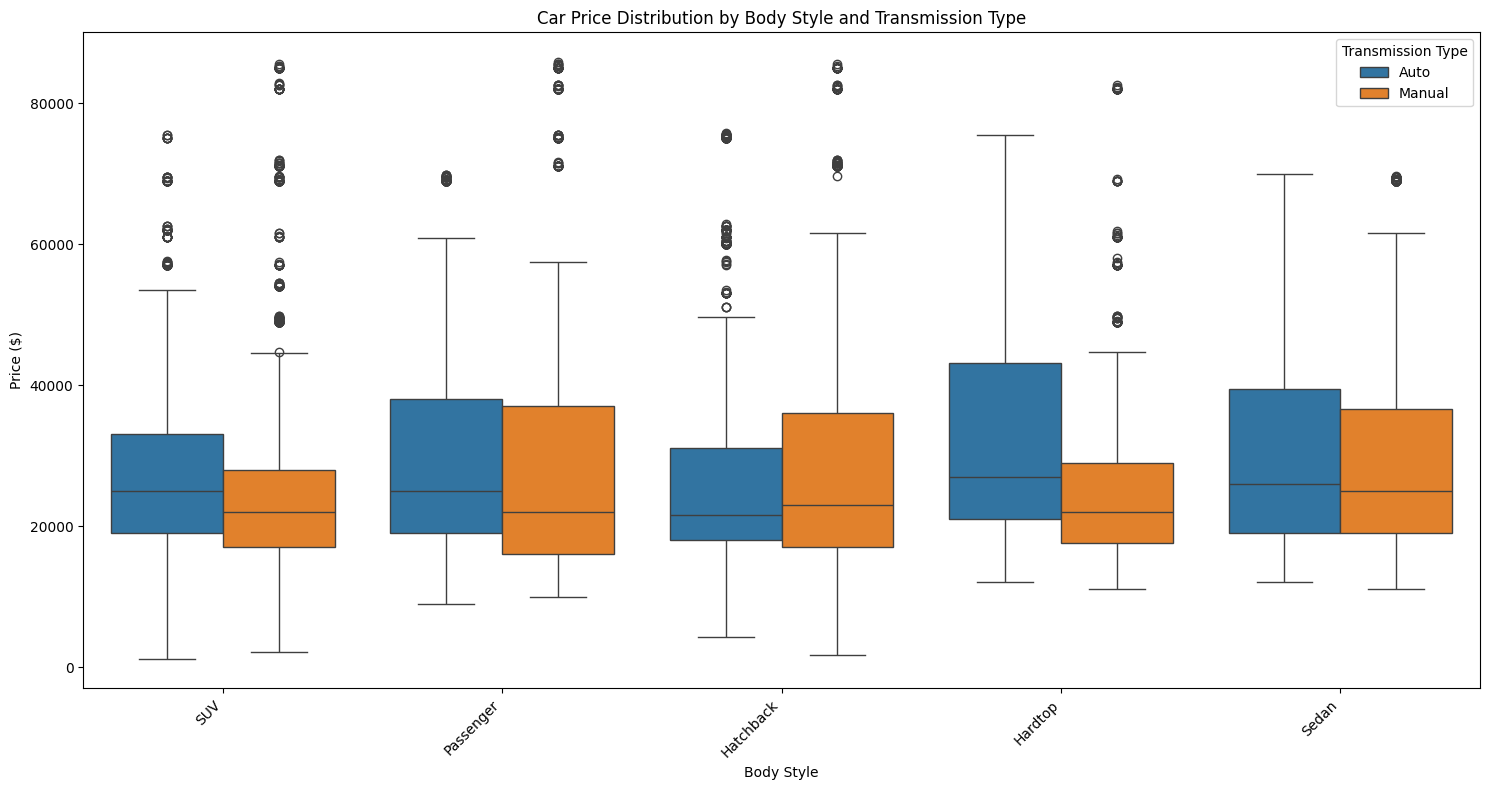

In [45]:
# Q13. How does the car price distribution change when considering different combinations of body style and transmission type?

# Group by Body Style and Transmission, then describe price distribution
price_dist_by_body_trans = df.groupby(['Body Style', 'Transmission'])['Price ($)'].describe()
print("Q13 — Price distribution by Body Style and Transmission Type:")
display(price_dist_by_body_trans)

# Visualize price distribution using box plots for each combination
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x='Body Style', y='Price ($)', hue='Transmission')
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transmission Type')
plt.tight_layout()
plt.show()

Q14 — Correlation matrix between Car Price and Annual Income:


,Price ($),Annual Income
Price ($),1.000000,0.012065
Annual Income,0.012065,1.000000


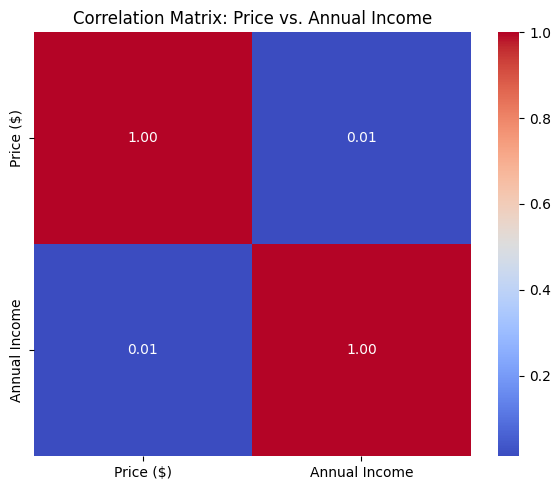

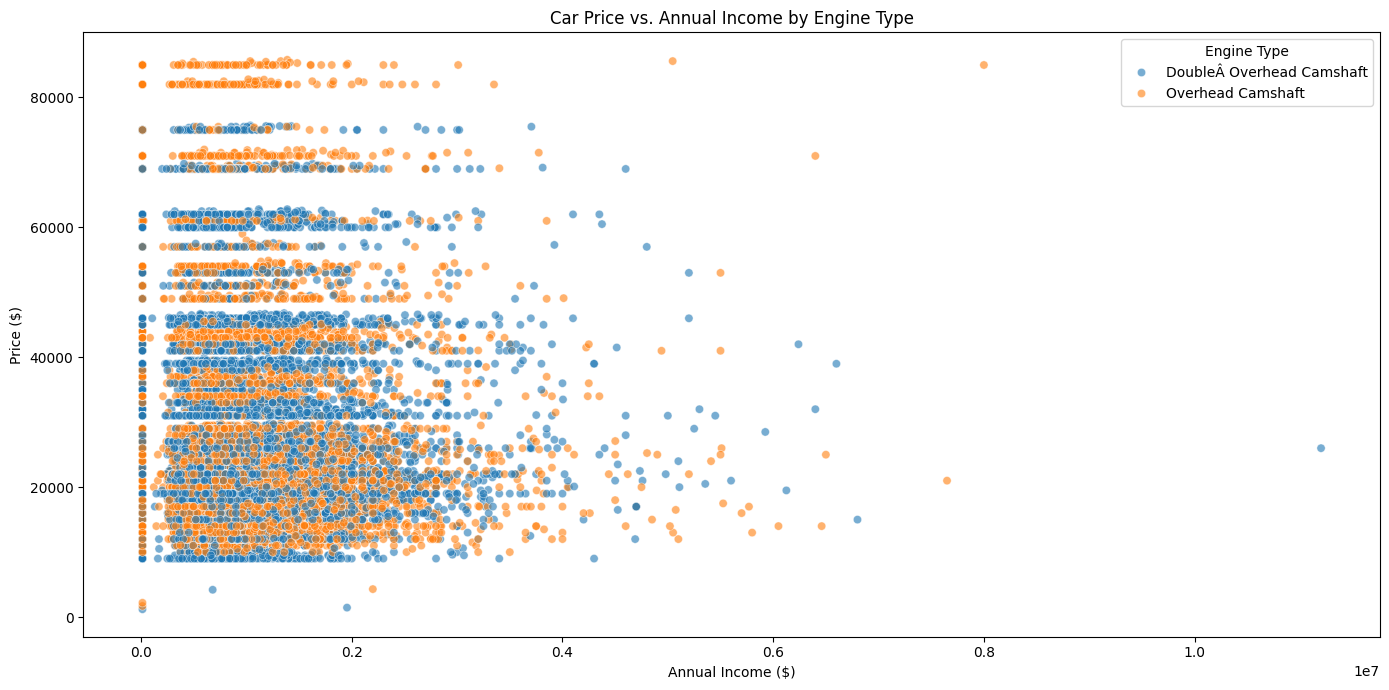

In [46]:
# Q14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

# For this question, since 'Engine' is categorical, we will focus on 'Price ($)' and 'Annual Income' for direct correlation.
# To include 'Engine', we can analyze the correlation within each engine type, or use a more complex model.
# Given the request for 'correlation between', we'll start with numerical features and then consider interactions.

# Create a DataFrame with relevant numeric columns
correlation_df = df[['Price ($)', 'Annual Income']].copy()

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()
print("Q14 — Correlation matrix between Car Price and Annual Income:")
display(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Price vs. Annual Income')
plt.tight_layout()
plt.show()

# For interaction with 'Engine' (categorical), we can look at average prices for different engine types
# at different income levels, or use a more advanced statistical method like ANOVA if applicable.
# Let's visualize Price vs. Annual Income for each Engine type to see interaction.

plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x='Annual Income', y='Price ($)', hue='Engine', alpha=0.6)
plt.title('Car Price vs. Annual Income by Engine Type')
plt.xlabel('Annual Income ($)')
plt.ylabel('Price ($)')
plt.legend(title='Engine Type')
plt.tight_layout()
plt.show()

Q15 — Average car price by Model and Engine Type (top 20 rows):


,Model,Engine,Price ($)
212,SC,Overhead Camshaft,61074.818182
198,Ranger,DoubleÂ Overhead Camshaft,61064.055556
222,Sable,Overhead Camshaft,61039.770833
56,Catera,DoubleÂ Overhead Camshaft,56836.933333
143,LX470,Overhead Camshaft,54037.490196
139,LS400,Overhead Camshaft,53157.941558
111,GS400,Overhead Camshaft,53086.000000
239,Tacoma,DoubleÂ Overhead Camshaft,53085.821918
25,Aurora,Overhead Camshaft,51833.556962
173,Park Avenue,DoubleÂ Overhead Camshaft,49387.750000


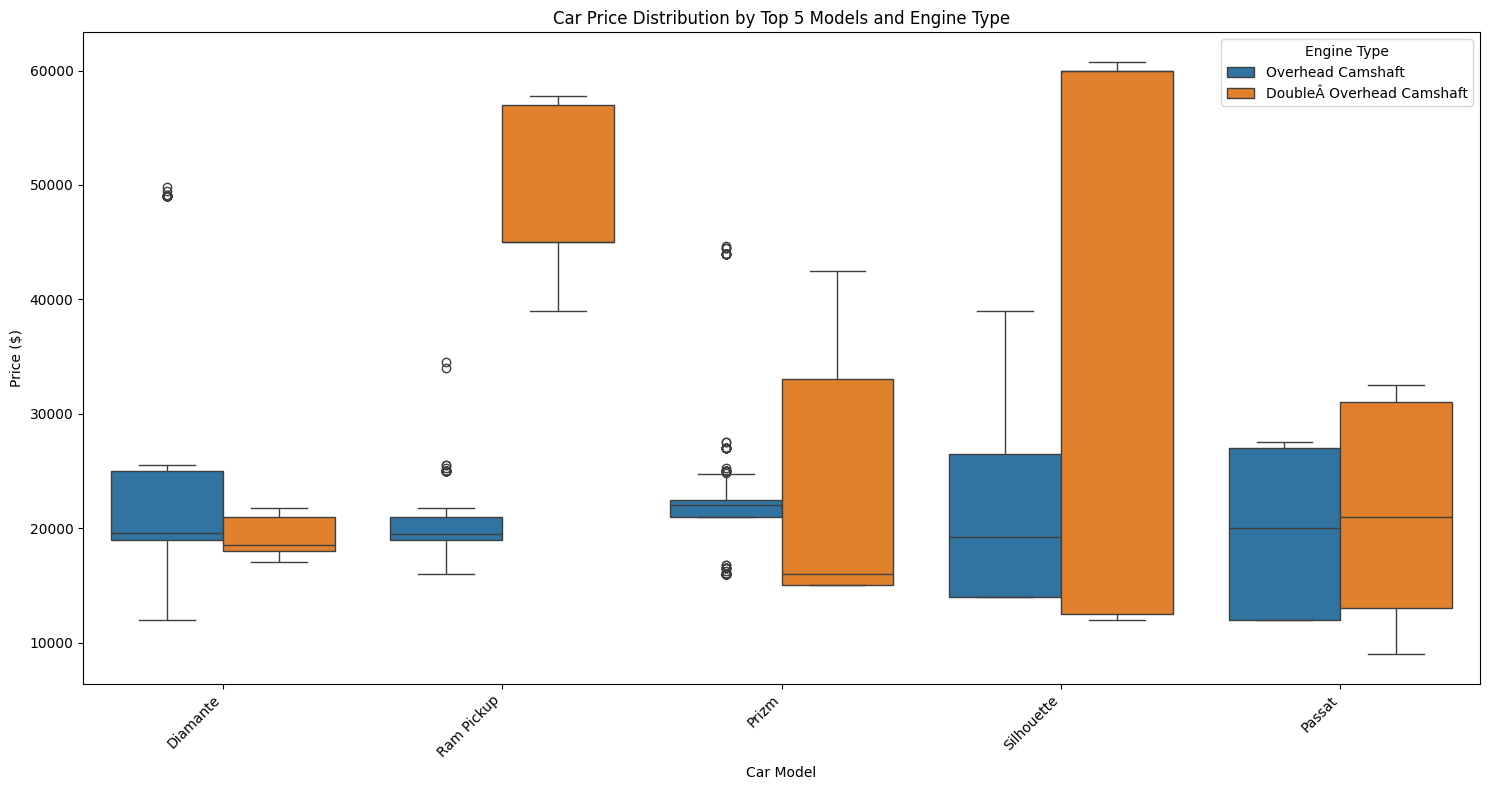

In [47]:
# Q15. How does the average car price vary across different car models and engine types?

# Group by Model and Engine type, then calculate the average Price
avg_price_by_model_engine = df.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()

print("Q15 — Average car price by Model and Engine Type (top 20 rows):")
display(avg_price_by_model_engine.sort_values('Price ($)', ascending=False).head(20))

# For visualization, it's challenging to plot all combinations due to the number of unique models.
# Let's consider the top N models by sales and visualize their price variation by engine type.

# Get the top 5 car models by sales count (re-using previous calculation or re-calculating if needed)
top_5_models = df['Model'].value_counts().head(5).index.tolist()
df_top_5_models = df[df['Model'].isin(top_5_models)]

plt.figure(figsize=(15, 8))
import seaborn as sns
sns.boxplot(data=df_top_5_models, x='Model', y='Price ($)', hue='Engine')
plt.title('Car Price Distribution by Top 5 Models and Engine Type')
plt.xlabel('Car Model')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Engine Type')
plt.tight_layout()
plt.show()

## **EDA - 3**

# Amazon Sales Data

# Description:

 This dataset contains information on 1K+ Amazon products, including their ratings, reviews, and other details.

# Features:

 product_id: Unique identifier for each product
 product_name: Name of the product
 category: Category of the product
 discounted_price: Discounted price of the product
 actual_price: Actual price of the product
 discount_percentage: Percentage of discount for the product
 rating: Rating of the product (1-5)
 rating_count: Number of people who voted for the Amazon rating
 about_product: Description about the product
 user_id: ID of the user who wrote the review
 user_name: Name of the user who wrote the review
 review_id: ID of the user review
 review_title: Short review
 review_content: Long review
 img_link: Image link of the product
 product_link: Official website link of the product

 Source:Amazon Sales

# **Questions**

 Q1. What is the average rating for each product category

 Q2. What are the top rating_count products by category

 Q3. What is the distribution of discounted prices vs. actual prices

 Q4. How does the average discount percentage vary across categories

 Q5. What are the most popular product names

 Q6. What are the most popular product keywords

 Q7. What are the most popular product reviews

 Q8. What is the correlation between discounted_price and rating

 Q9. What are the Top 5 categories based on the highest ratings

 Q10. Identify any potential areas for improvement or optimization based on the data analysis

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

PATH = "/content/amazon.csv"     # change if needed
df = pd.read_csv(PATH)

# Clean column names
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]

print("Dataset Loaded:", df.shape)
display(df.head())

# Clean and ensure numeric columns
if "discounted_price" in df.columns:
    df["discounted_price"] = df["discounted_price"].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)
if "actual_price" in df.columns:
    df["actual_price"] = df["actual_price"].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)
if "discount_percentage" in df.columns:
    df["discount_percentage"] = df["discount_percentage"].astype(str).str.replace('%', '').astype(float)
if "rating" in df.columns:
    df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
if "rating_count" in df.columns:
    df["rating_count"] = df["rating_count"].astype(str).str.replace(',', '').astype(float)

# Fill missing categories
df["category"] = df["category"].astype(str).str.strip()

print("\nSummary of important numeric columns:")
display(df[["discounted_price","actual_price","discount_percentage","rating","rating_count"]].describe())

Dataset Loaded: (1465, 16)


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...



Summary of important numeric columns:


,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1464.000000,1463.000000
mean,3125.310874,5444.990635,47.691468,4.096585,18295.541353
std,6944.304394,10874.826864,21.635905,0.291674,42753.864952
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,325.000000,800.000000,32.000000,4.000000,1186.000000
50%,799.000000,1650.000000,50.000000,4.100000,5179.000000
75%,1999.000000,4295.000000,63.000000,4.300000,17336.500000
max,77990.000000,139900.000000,94.000000,5.000000,426973.000000


In [18]:
# Q1. What is the average rating for each product category
avg_rating_by_category = df.groupby('category')['rating'].mean().reset_index()
print("Q1 — Average rating for each product category:")
display(avg_rating_by_category.sort_values(by='rating', ascending=False))

Q1 — Average rating for each product category:


,category,rating
57,Computers&Accessories|Tablets,4.6
48,Computers&Accessories|NetworkingDevices|Networ...,4.5
62,Electronics|Cameras&Photography|Accessories|Film,4.5
38,Computers&Accessories|Components|Memory,4.5
81,Electronics|HomeAudio|MediaStreamingDevices|St...,4.5
...,...,...
3,Computers&Accessories|Accessories&Peripherals|...,3.6
88,"Electronics|HomeTheater,TV&Video|Accessories|3...",3.5
2,Computers&Accessories|Accessories&Peripherals|...,3.5
14,Computers&Accessories|Accessories&Peripherals|...,3.4


In [19]:
# Q2. What are the top rating_count products by category
# For each category, get the product with the highest rating_count
idx = df.groupby('category')['rating_count'].idxmax()
top_rating_count_products = df.loc[idx, ['category', 'product_name', 'rating_count']]

print("Q2 — Top product by rating count for each category:")
display(top_rating_count_products.sort_values(by='rating_count', ascending=False).head(20))

Q2 — Top product by rating count for each category:


,category,product_name,rating_count
12,"Electronics|HomeTheater,TV&Video|Accessories|C...",AmazonBasics Flexible Premium HDMI Cable (Blac...,426973.0
352,"Electronics|Headphones,Earbuds&Accessories|Hea...",boAt Bassheads 100 in Ear Wired Earphones with...,363713.0
370,Electronics|Mobiles&Accessories|Smartphones&Ba...,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",313836.0
1028,Home&Kitchen|Kitchen&Dining|KitchenTools|Manua...,Pigeon Polypropylene Mini Handy and Compact Ch...,270563.0
588,Computers&Accessories|ExternalDevices&DataStor...,SanDisk Cruzer Blade 32GB USB Flash Drive,253105.0
864,Electronics|Accessories|MemoryCards|MicroSD,SanDisk Extreme SD UHS I 64GB Card for 4K Vide...,205052.0
143,Computers&Accessories|NetworkingDevices|Networ...,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,179692.0
337,Electronics|Mobiles&Accessories|MobileAccessor...,MI Power Bank 3i 20000mAh Lithium Polymer 18W ...,178912.0
191,Computers&Accessories|Accessories&Peripherals|...,Amazon Basics USB A to Lightning MFi Certified...,178817.0
701,Computers&Accessories|NetworkingDevices|Repeat...,TP-Link TL-WA850RE Single_Band 300Mbps RJ45 Wi...,156638.0


Q3 — Distribution of Discounted Prices vs. Actual Prices:


,discounted_price,actual_price
count,1465.000000,1465.000000
mean,3125.310874,5444.990635
std,6944.304394,10874.826864
min,39.000000,39.000000
25%,325.000000,800.000000
50%,799.000000,1650.000000
75%,1999.000000,4295.000000
max,77990.000000,139900.000000


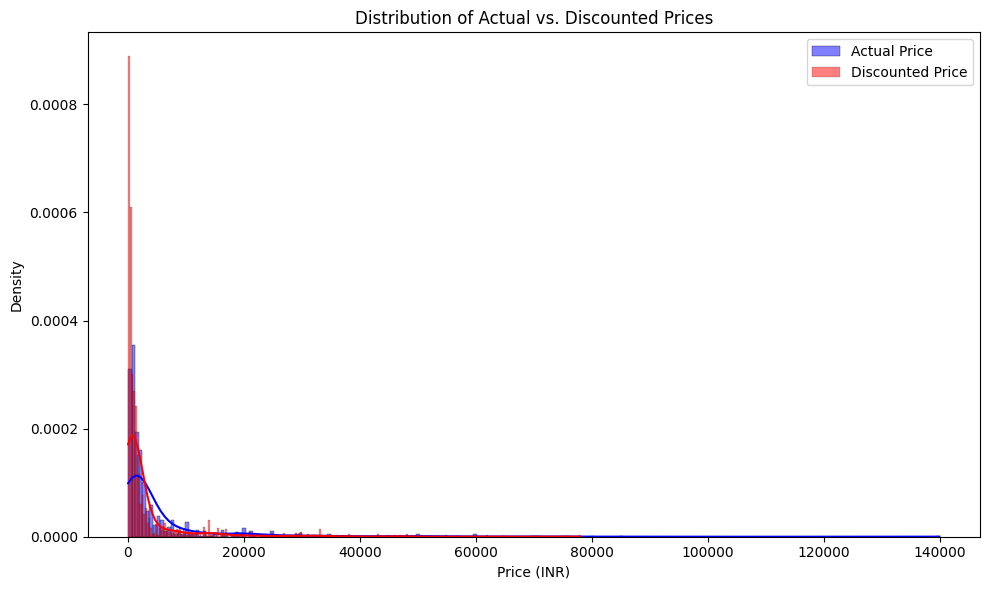

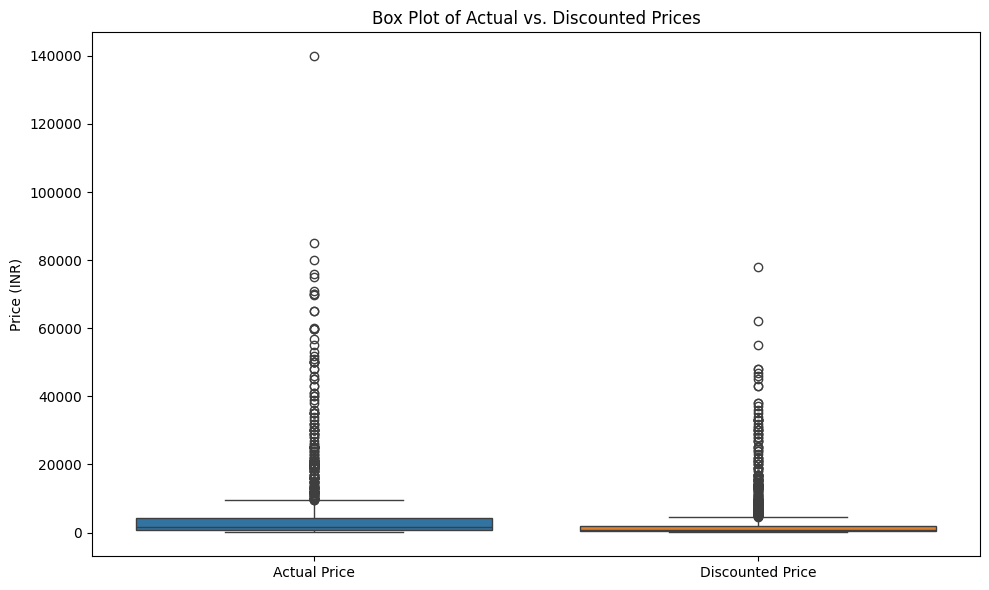

In [20]:
# Q3. What is the distribution of discounted prices vs. actual prices

print("Q3 — Distribution of Discounted Prices vs. Actual Prices:")
display(df[['discounted_price', 'actual_price']].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df['actual_price'], color='blue', label='Actual Price', kde=True, stat='density', alpha=0.5)
sns.histplot(df['discounted_price'], color='red', label='Discounted Price', kde=True, stat='density', alpha=0.5)
plt.title('Distribution of Actual vs. Discounted Prices')
plt.xlabel('Price (INR)')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['actual_price', 'discounted_price']])
plt.title('Box Plot of Actual vs. Discounted Prices')
plt.ylabel('Price (INR)')
plt.xticks(ticks=[0, 1], labels=['Actual Price', 'Discounted Price'])
plt.tight_layout()
plt.show()

Q4 — Average discount percentage by category:


,category,discount_percentage
6,Computers&Accessories|Accessories&Peripherals|...,90.000000
75,"Electronics|Headphones,Earbuds&Accessories|Ear...",90.000000
106,Electronics|Mobiles&Accessories|MobileAccessor...,90.000000
73,"Electronics|Headphones,Earbuds&Accessories|Ada...",88.000000
14,Computers&Accessories|Accessories&Peripherals|...,87.500000
110,Electronics|Mobiles&Accessories|MobileAccessor...,82.000000
36,Computers&Accessories|Components|InternalHardD...,80.000000
1,Computers&Accessories|Accessories&Peripherals|...,78.500000
114,Electronics|Mobiles&Accessories|MobileAccessor...,76.400000
74,"Electronics|Headphones,Earbuds&Accessories|Cases",76.000000


/tmp/ipython-input-2151527476.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


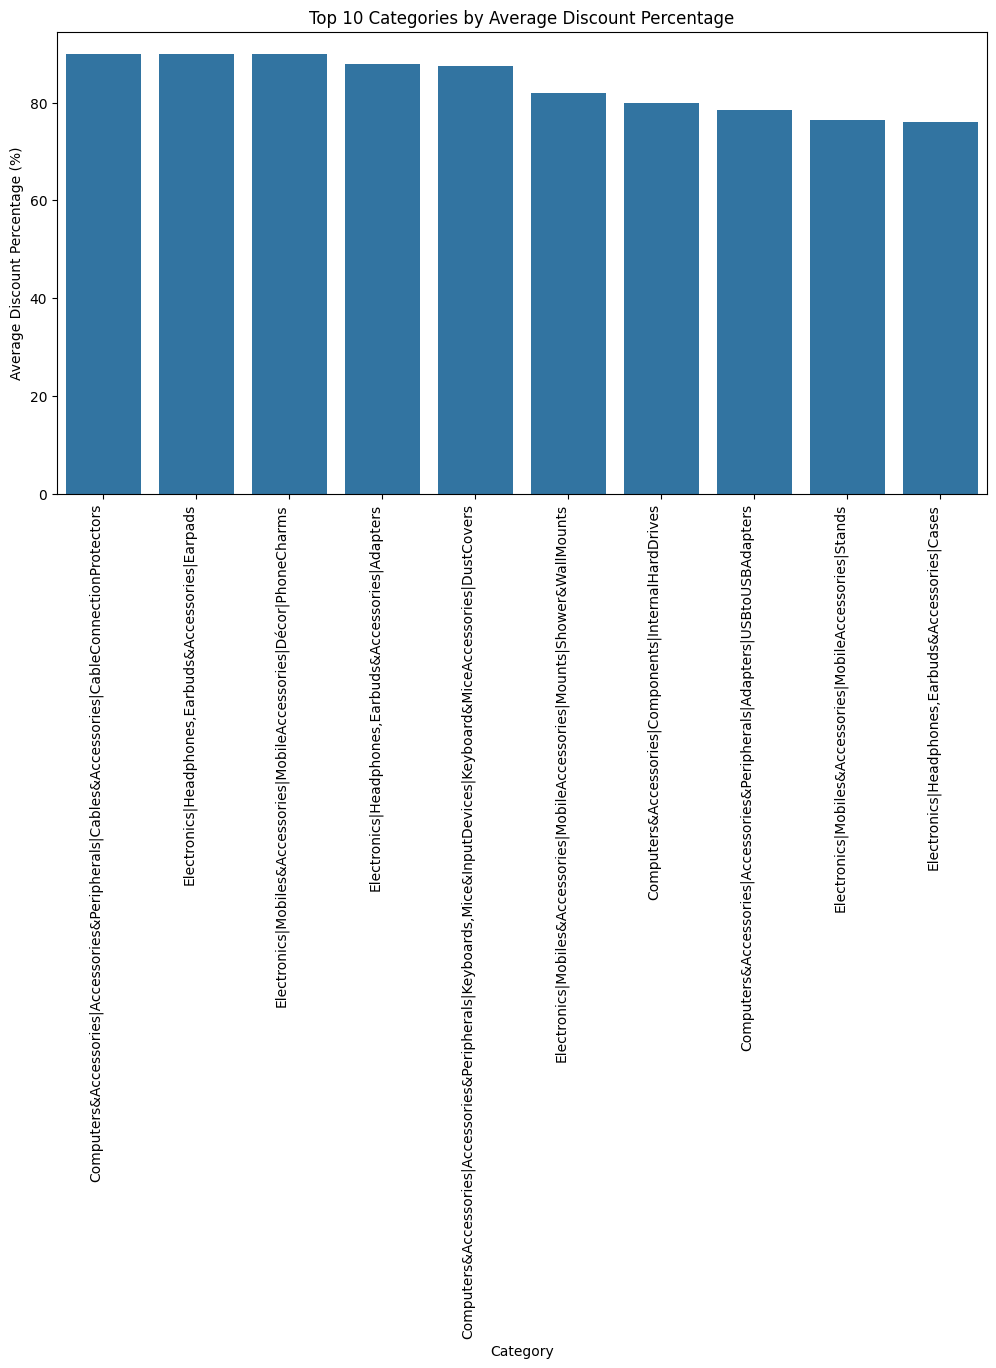

In [21]:
# Q4. How does the average discount percentage vary across categories
avg_discount_by_category = df.groupby('category')['discount_percentage'].mean().reset_index()
print("Q4 — Average discount percentage by category:")
display(avg_discount_by_category.sort_values(by='discount_percentage', ascending=False).head(20))

# Visualize top N categories by average discount percentage
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_discount_by_category.sort_values(by='discount_percentage', ascending=False).head(10), x='category', y='discount_percentage')
plt.title('Top 10 Categories by Average Discount Percentage')
plt.xlabel('Category')
plt.ylabel('Average Discount Percentage (%)')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

Q5 — Most popular product names (top 20):


,count
product_name,
"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution",5
"Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3"",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating",4
"Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)",3
"Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black",3
Flix Micro Usb Cable For Smartphone (Black),3
"Fire-Boltt India's No 1 Smartwatch Brand Talk 2 Bluetooth Calling Smartwatch with Dual Button, Hands On Voice Assistance, 60 Sports Modes, in Built Mic & Speaker with IP68 Rating",3
"Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)",3
"Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)",3
"Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices",3


/tmp/ipython-input-1676081882.py:13: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


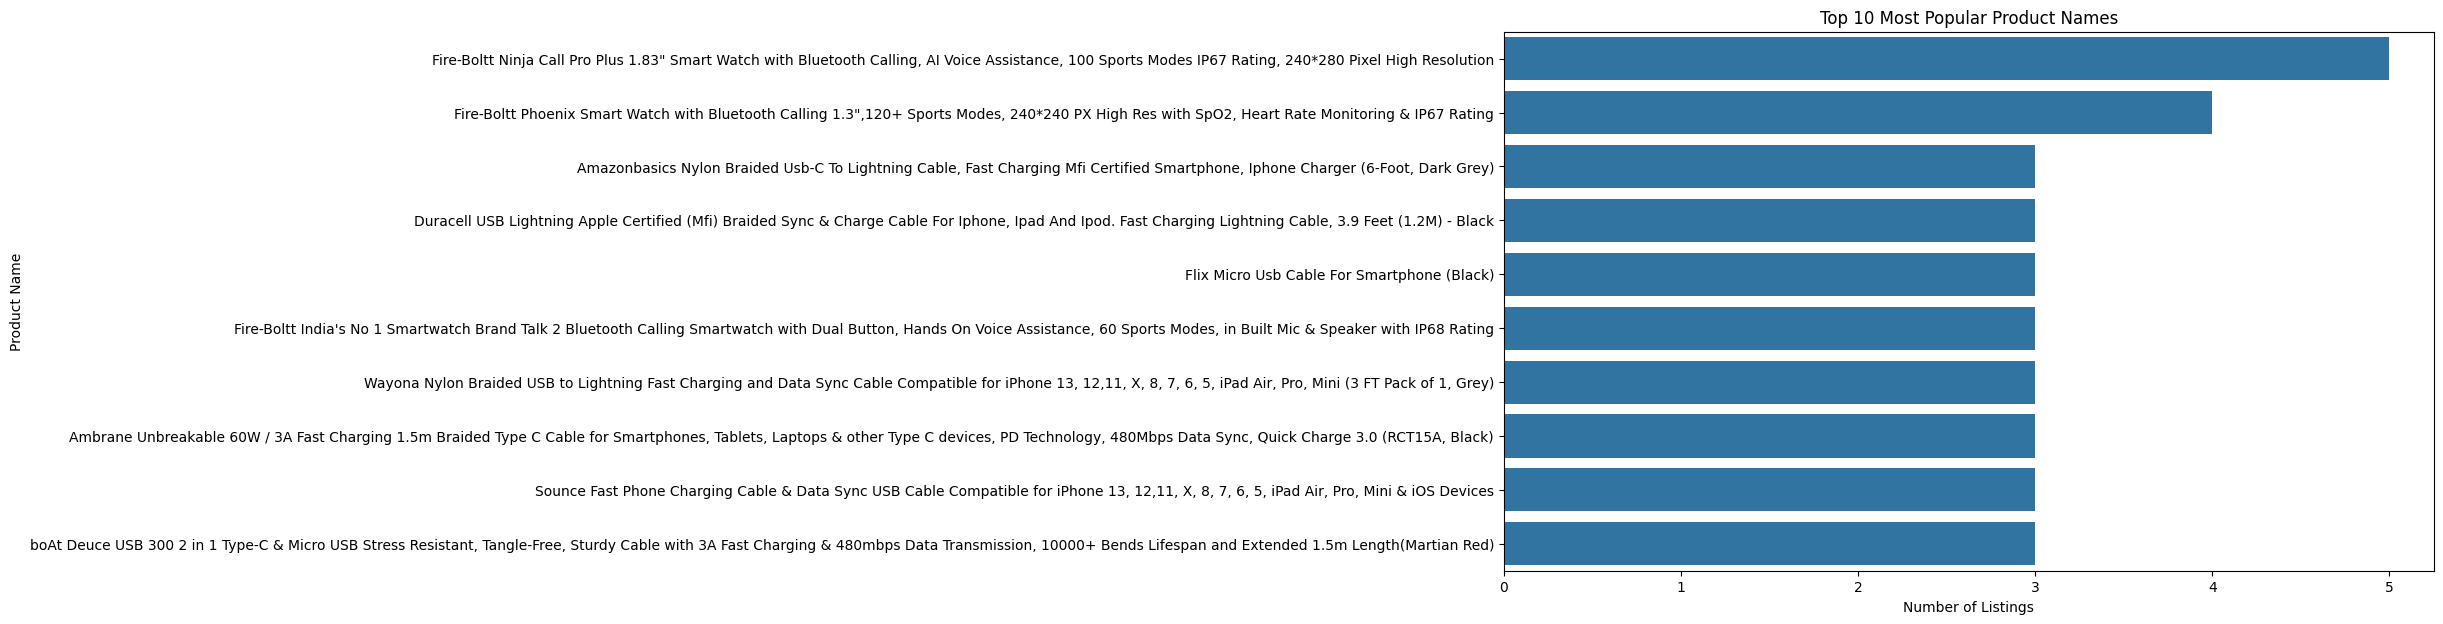

In [22]:
# Q5. What are the most popular product names
# Popularity can be defined by the frequency of appearance in the dataset
product_name_counts = df['product_name'].value_counts()
print("Q5 — Most popular product names (top 20):")
display(product_name_counts.head(20))

# Optionally, visualize the top N popular product names
plt.figure(figsize=(12, 7))
sns.barplot(y=product_name_counts.head(10).index, x=product_name_counts.head(10).values)
plt.title('Top 10 Most Popular Product Names')
plt.xlabel('Number of Listings')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

Q6 — Most popular product keywords (top 20):


,Keyword,Frequency
0,usb,1398
1,cable,1232
2,can,892
3,charging,867
4,fast,576
5,warranty,570
6,type,561
7,power,552
8,black,550
9,devices,532


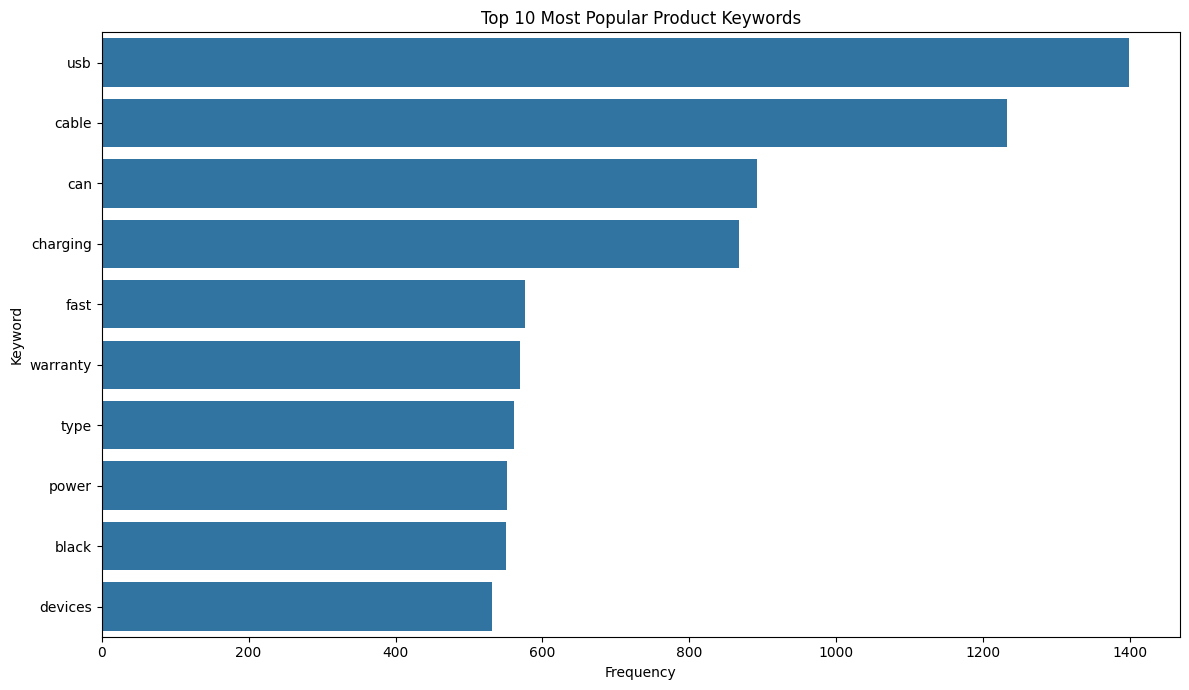

In [23]:
# Q6. What are the most popular product keywords
# Extract keywords from 'product_name' and 'about_product' for better insight
# Combine text columns into a single string for keyword extraction

# Ensure 'product_name' and 'about_product' are strings and handle potential NaN values
df['product_name_str'] = df['product_name'].fillna('').astype(str)
df['about_product_str'] = df['about_product'].fillna('').astype(str)

# Create a combined text column
df['combined_text'] = df['product_name_str'] + ' ' + df['about_product_str']

# Tokenize and count words
from collections import Counter
import re

def tokenize_text(text):
    # Convert to lowercase and remove non-alphanumeric characters except spaces
    text = re.sub(r'[^a-z0-9\s]', '', text.lower())
    words = text.split()
    # Filter out common stopwords and short words
    stopwords = set(['a', 'an', 'the', 'and', 'or', 'for', 'with', 'in', 'of', 'is', 'it', 'on', 'to', 'from', 'by', 'this', 'that', 'with', 'your', 'you'])
    filtered_words = [word for word in words if word not in stopwords and len(word) > 2]
    return filtered_words

all_keywords = []
for text in df['combined_text']:
    all_keywords.extend(tokenize_text(text))

keyword_counts = Counter(all_keywords)

print("Q6 — Most popular product keywords (top 20):")
display(pd.DataFrame(keyword_counts.most_common(20), columns=['Keyword', 'Frequency']))

# Optional: visualize top keywords
plt.figure(figsize=(12, 7))
sns.barplot(y=[item[0] for item in keyword_counts.most_common(10)], x=[item[1] for item in keyword_counts.most_common(10)])
plt.title('Top 10 Most Popular Product Keywords')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.tight_layout()
plt.show()

In [24]:
# Q7. What are the most popular product reviews
# Popularity here can be interpreted as reviews with high rating counts or reviews themselves.
# Given the dataset structure, we'll look at the review content/title associated with high rating_count.
# Alternatively, we could analyze the frequency of review titles or contents.

# Let's consider 'popular' by products that have high overall rating counts, and then look at their reviews.
# We already identified top products by rating_count in Q2. Let's get the top 5 products (not categories) overall by rating_count.

top_5_products_overall = df.sort_values(by='rating_count', ascending=False).head(5)
print("Q7 — Products with the highest rating counts and their reviews:")
for index, row in top_5_products_overall.iterrows():
    print(f"\nProduct Name: {row['product_name']}")
    print(f"Rating Count: {row['rating_count']}")
    print(f"Review Title(s): {row['review_title']}")
    print(f"Review Content(s): {row['review_content']}")
    print("--------------------------------------------------")

# Alternative: Most frequent review titles (this might be repetitive if many products have generic titles)
# review_title_counts = df['review_title'].value_counts().head(20)
# print("\nQ7 — Most frequent review titles:")
# display(review_title_counts)

Q7 — Products with the highest rating counts and their reviews:

Product Name: Amazon Basics High-Speed HDMI Cable, 6 Feet - Supports Ethernet, 3D, 4K video,Black
Rating Count: 426973.0
Review Title(s): It's quite good and value for money,Works well,Hdmi cable,Value for money,All good,Gets the job done,Delivery was good,This one was my need to purchase
Review Content(s): I am using it for 14 days now. The experience is pretty good as of now. Picture quality is also not bad. Don't expect something out of the world at this price point. But you can go for it if you have a tight budget.,Initial impressions: works as said, glad I didn’t go for cheaper options (not that it’s too costly) just plug and play. Will update if it screws up,The hdmi cable is good to watch movie,sports and its gives better quality while connecting your laptop with TV and play 🎮.I loved it,Works as expected. Length of the cable is short and it was mentioned also satisfied my requirement. If you need more length bette

Q8 — Pearson correlation between discounted_price and rating: 0.1203


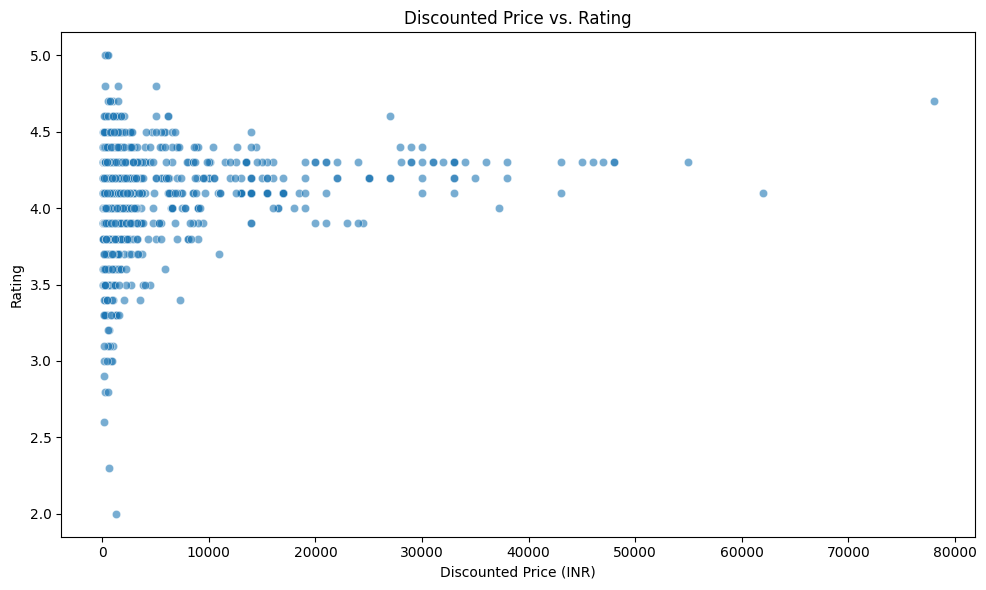

In [25]:
# Q8. What is the correlation between discounted_price and rating
correlation = df['discounted_price'].corr(df['rating'])
print(f"Q8 — Pearson correlation between discounted_price and rating: {correlation:.4f}")

# Visualize the relationship with a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='discounted_price', y='rating', alpha=0.6)
plt.title('Discounted Price vs. Rating')
plt.xlabel('Discounted Price (INR)')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

Q9 — Top 5 categories based on the highest average ratings:


,rating
category,
Computers&Accessories|Tablets,4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters,4.5
Electronics|Cameras&Photography|Accessories|Film,4.5
Computers&Accessories|Components|Memory,4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients,4.5


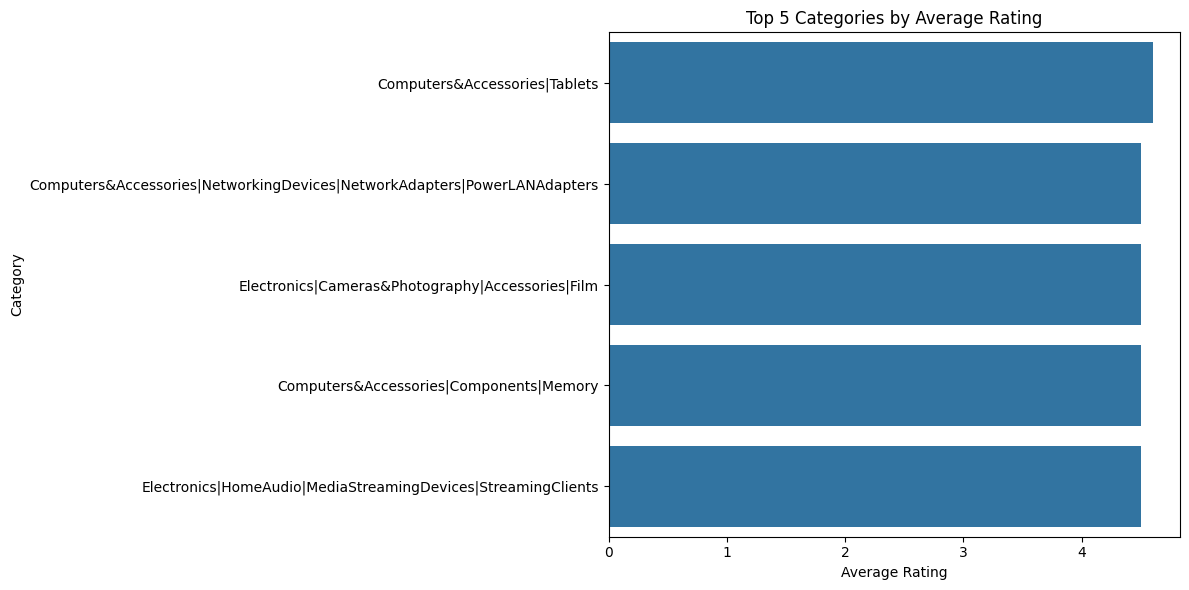

In [26]:
# Q9. What are the Top 5 categories based on the highest ratings
# Calculate average rating per category and sort to find top 5
top_5_categories_by_rating = df.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)
print("Q9 — Top 5 categories based on the highest average ratings:")
display(top_5_categories_by_rating)

# Visualize top 5 categories by average rating
plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_categories_by_rating.values, y=top_5_categories_by_rating.index)
plt.title('Top 5 Categories by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

In [27]:
# Q10. Identify any potential areas for improvement or optimization based on the data analysis
# Based on the previous analyses:
# 1. High Discount Categories: Categories with very high average discount percentages (e.g., 90% in some sub-categories of 'Computers&Accessories' and 'Electronics|Headphones') might indicate overstocking, highly competitive markets, or products nearing end-of-life. Optimization could involve reviewing pricing strategies, improving inventory management, or focusing on product differentiation.
# 2. Low-Rated Categories/Products: Categories with consistently lower average ratings (e.g., 'Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea...' with a 3.3 rating) suggest areas for product quality improvement, clearer descriptions, or better customer support.
# 3. Weak Correlation between Discount and Rating: A very weak positive correlation (0.1203) between discounted price and rating suggests that simply discounting a product doesn't strongly influence customer satisfaction. Optimization could be to explore what truly drives higher ratings (e.g., product features, brand reputation, service) rather than relying solely on price cuts for customer satisfaction.
# 4. Leverage Popular Keywords and Review Insights: The most popular keywords ('usb', 'cable', 'charging', 'fast') and insights from top reviews (e.g., 'value for money') can inform product development, marketing, and customer communication strategies.
# 5. Monitor Top-Rated Products: Continuously monitor and support products and categories with high average ratings (e.g., 'Computers&Accessories|Tablets' with 4.6 rating) to maintain customer satisfaction and market leadership.

## **EDA - 4**

# Dataset Link:

Spotify Data:Popular Hip-Hop Artists and Tracks

 Description of the Dataset:

 The dataset titled "Spotify Data: Popular Hip-hop Artists and Tracks" provides a curated collection of
approximately 500 entries showcasing the vibrant realm of hip-hop music. These entries meticulously compile
the most celebrated hip-hop tracks and artists, reflecting their significant influence on the genre's landscape.
Each entry not only highlights the popularity and musical composition of the tracks but also underscores the
creative prowess of the artists and their profound impact on global listeners.

# Application in Data Science:

 This dataset serves as a valuable resource for various data science explorations. Analysts can delve into trend
analysis to discern the popularity dynamics of hit hip-hop tracks over recent years. Additionally, the dataset
enables network analysis to uncover collaborative patterns among top artists, shedding light on the genre's
evolving collaborative landscape. Furthermore, it facilitates the development of predictive models aimed at
forecasting track popularity based on diverse features, offering insights for artists, producers, and marketers.

# Column Descriptors:

 Artist: The name of the artist, providing direct attribution to the creative mind behind the track.
 Track Name: The title of the track, encapsulating its identity and essence.
 Popularity: A numeric score reflecting the track's reception and appeal among Spotify listeners.
 Duration (ms): The track's length in milliseconds, detailing the temporal extent of the musical experience.
 Track ID: A unique identifier within Spotify's ecosystem, enabling direct access to the track for further
exploration.

# **Questions**

 Q1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
the needful

 Q2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram

 Q3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot

 q4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot

 Q5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each

 Q6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist

 Q7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist

 Q8. Visualize relationships between multiple numerical variables simultaneously using a pair plot

 Q9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
violin plot

 Q10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

PATH = "/content/spotify.csv"  # change if needed
df = pd.read_csv(PATH)

# Clean column names
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]

print("Dataset Loaded:", df.shape)
display(df.head())

# Convert numeric columns properly
for col in ["popularity", "duration_(ms)", "duration_ms"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# Handle missing values
print("\nMissing values BEFORE handling:")
display(df.isna().sum())

# Option: Fill or drop based on your EDA preference
df = df.dropna(subset=["artist", "track_name", "popularity"])

print("\nMissing values AFTER cleaning:")
display(df.isna().sum())

print("\nFinal Shape After Cleaning:", df.shape)


Dataset Loaded: (440, 5)


,artist,track_name,popularity,duration_(ms),track_id
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe



Missing values BEFORE handling:


,0
artist,0
track_name,0
popularity,0
duration_(ms),0
track_id,0



Missing values AFTER cleaning:


,0
artist,0
track_name,0
popularity,0
duration_(ms),0
track_id,0



Final Shape After Cleaning: (440, 5)


In [5]:
# Q1 (cont.). Check for duplicate rows, if present then do the needful
duplicates_before = df.duplicated().sum()
if duplicates_before > 0:
    print(f"Q1 — {duplicates_before} duplicate rows found. Removing duplicates...")
    df.drop_duplicates(inplace=True)
    print(f"Q1 — Duplicates removed. New shape: {df.shape}")
else:
    print("Q1 — No duplicate rows found.")

Q1 — 27 duplicate rows found. Removing duplicates...
Q1 — Duplicates removed. New shape: (413, 5)


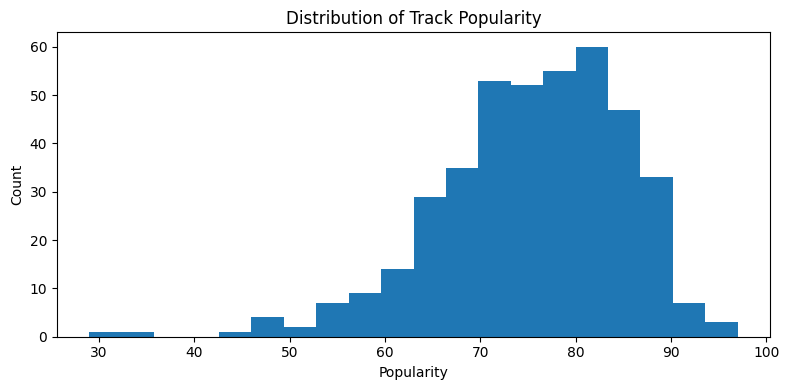

In [15]:
# Q2. What is the distribution of popularity among the tracks in the dataset?
plt.figure(figsize=(8,4))
plt.hist(df["popularity"], bins=20)
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.title("Distribution of Track Popularity")
plt.tight_layout()
plt.show()

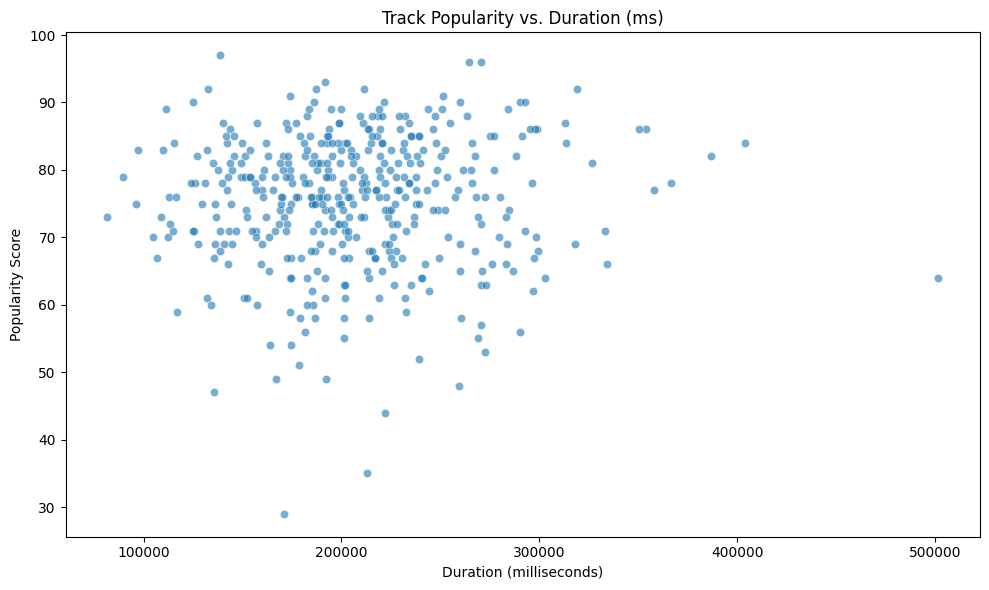

Q3 — Pearson correlation between Popularity and Duration: 0.0390


In [7]:
# Q3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot
import seaborn as sns
# Ensure 'duration_(ms)' column is available, if not, try 'duration_ms'
duration_col = 'duration_(ms)' if 'duration_(ms)' in df.columns else ('duration_ms' if 'duration_ms' in df.columns else None)

if duration_col:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=duration_col, y='popularity', alpha=0.6)
    plt.title('Track Popularity vs. Duration (ms)')
    plt.xlabel('Duration (milliseconds)')
    plt.ylabel('Popularity Score')
    plt.tight_layout()
    plt.show()

    # Calculate Pearson correlation coefficient
    correlation = df[duration_col].corr(df['popularity'])
    print(f"Q3 — Pearson correlation between Popularity and Duration: {correlation:.4f}")
else:
    print("Duration column not found in the dataset. Please check column names.")

Q4 — Artist with the highest number of tracks:


,count
artist,
Drake,17
Eminem,11
Lil Nas X,10
JAY-Z,10
21 Savage,10
Flo Rida,10
¥$,10
Timbaland,10
Ludacris,10


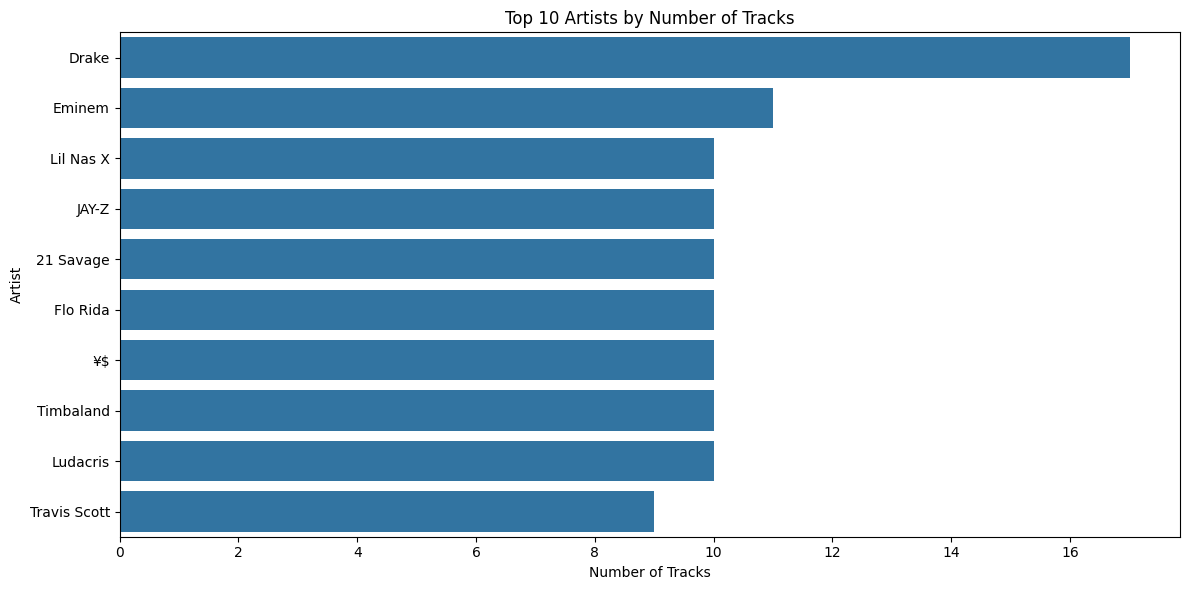

In [8]:
# Q4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot

artist_track_counts = df['artist'].value_counts()
print("Q4 — Artist with the highest number of tracks:")
display(artist_track_counts.head(10))

# Visualize top artists by track count
plt.figure(figsize=(12, 6))
sns.barplot(y=artist_track_counts.index[:10], x=artist_track_counts.values[:10])
plt.title('Top 10 Artists by Number of Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()

In [9]:
# Q5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each
least_popular_tracks = df.sort_values(by='popularity', ascending=True).head(5)
print("Q5 — Top 5 least popular tracks:")
display(least_popular_tracks[['artist', 'track_name', 'popularity']])

Q5 — Top 5 least popular tracks:


,artist,track_name,popularity
207,Pressa,Attachments (feat. Coi Leray),29
231,Justin Bieber,Intentions,35
413,French Montana,Splash Brothers,44
225,Lil Baby,On Me - Remix,47
407,Wyclef Jean,911 (feat. Mary J. Blige),48


Q6 — Top 5 artists by track count: ['Drake', 'Eminem', 'Lil Nas X', 'JAY-Z', '21 Savage']

Q6 — Average popularity for these top 5 artists:


,popularity
artist,
21 Savage,83.800000
Eminem,83.636364
Drake,82.882353
JAY-Z,77.900000
Lil Nas X,75.900000


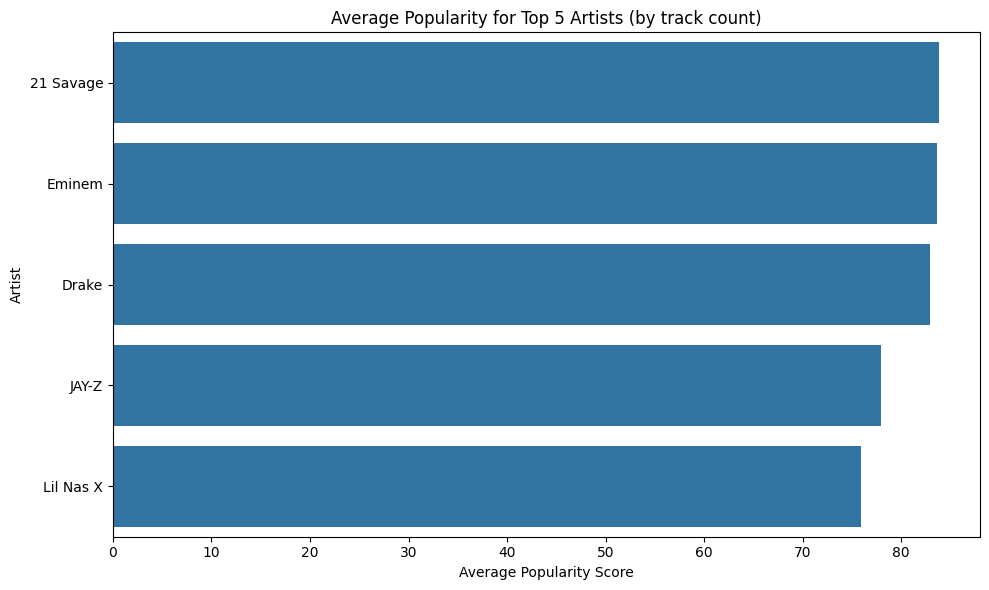

In [10]:
# Q6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist

# First, identify the top 5 artists based on the number of tracks (from Q4)
top_5_artists_by_tracks = df['artist'].value_counts().head(5).index.tolist()

# Filter the DataFrame for tracks by these top 5 artists
df_top_5_artists = df[df['artist'].isin(top_5_artists_by_tracks)]

# Calculate the average popularity for each of these artists
avg_popularity_top_5_artists = df_top_5_artists.groupby('artist')['popularity'].mean().sort_values(ascending=False)

print(f"Q6 — Top 5 artists by track count: {top_5_artists_by_tracks}")
print("\nQ6 — Average popularity for these top 5 artists:")
display(avg_popularity_top_5_artists)

# Visualize the average popularity for top 5 artists
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_popularity_top_5_artists.values, y=avg_popularity_top_5_artists.index)
plt.title('Average Popularity for Top 5 Artists (by track count)')
plt.xlabel('Average Popularity Score')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()

In [11]:
# Q7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist

# Re-use the top 5 artists identified in Q6
top_5_artists_by_tracks = df['artist'].value_counts().head(5).index.tolist()

print("Q7 — Most popular tracks for the top 5 artists (by track count):")

for artist_name in top_5_artists_by_tracks:
    # Filter tracks for the current artist
    artist_tracks = df[df['artist'] == artist_name]
    # Sort by popularity and get the top track(s)
    most_popular_track = artist_tracks.sort_values(by='popularity', ascending=False).iloc[0]
    print(f"\nArtist: {artist_name}")
    print(f"  Most Popular Track: {most_popular_track['track_name']} (Popularity: {most_popular_track['popularity']})")

Q7 — Most popular tracks for the top 5 artists (by track count):

Artist: Drake
  Most Popular Track: Rich Baby Daddy (feat. Sexyy Red & SZA) (Popularity: 92)

Artist: Eminem
  Most Popular Track: Without Me (Popularity: 90)

Artist: Lil Nas X
  Most Popular Track: THATS WHAT I WANT (Popularity: 81)

Artist: JAY-Z
  Most Popular Track: Ni**as In Paris (Popularity: 86)

Artist: 21 Savage
  Most Popular Track: redrum (Popularity: 96)


<Figure size 800x700 with 0 Axes>

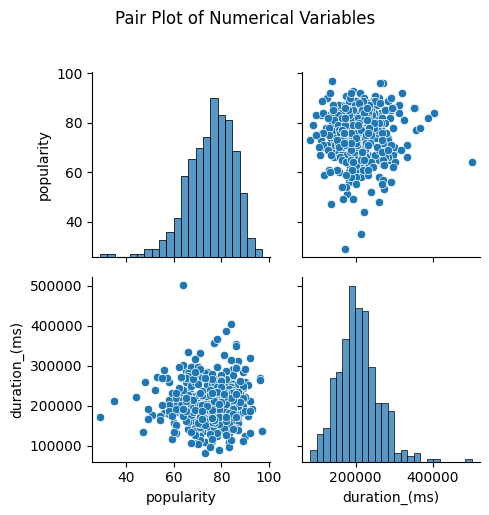

In [12]:
# Q8. Visualize relationships between multiple numerical variables simultaneously using a pair plot

# Select numerical columns for the pair plot
# Ensure 'duration_(ms)' column is available, if not, try 'duration_ms'
duration_col = 'duration_(ms)' if 'duration_(ms)' in df.columns else ('duration_ms' if 'duration_ms' in df.columns else None)

if duration_col:
    numerical_cols = ['popularity', duration_col]
    plt.figure(figsize=(8, 7))
    sns.pairplot(df[numerical_cols])
    plt.suptitle('Pair Plot of Numerical Variables', y=1.02) # Adjust suptitle position
    plt.tight_layout()
    plt.show()
else:
    print("Numerical columns (popularity, duration) not found for pair plot.")

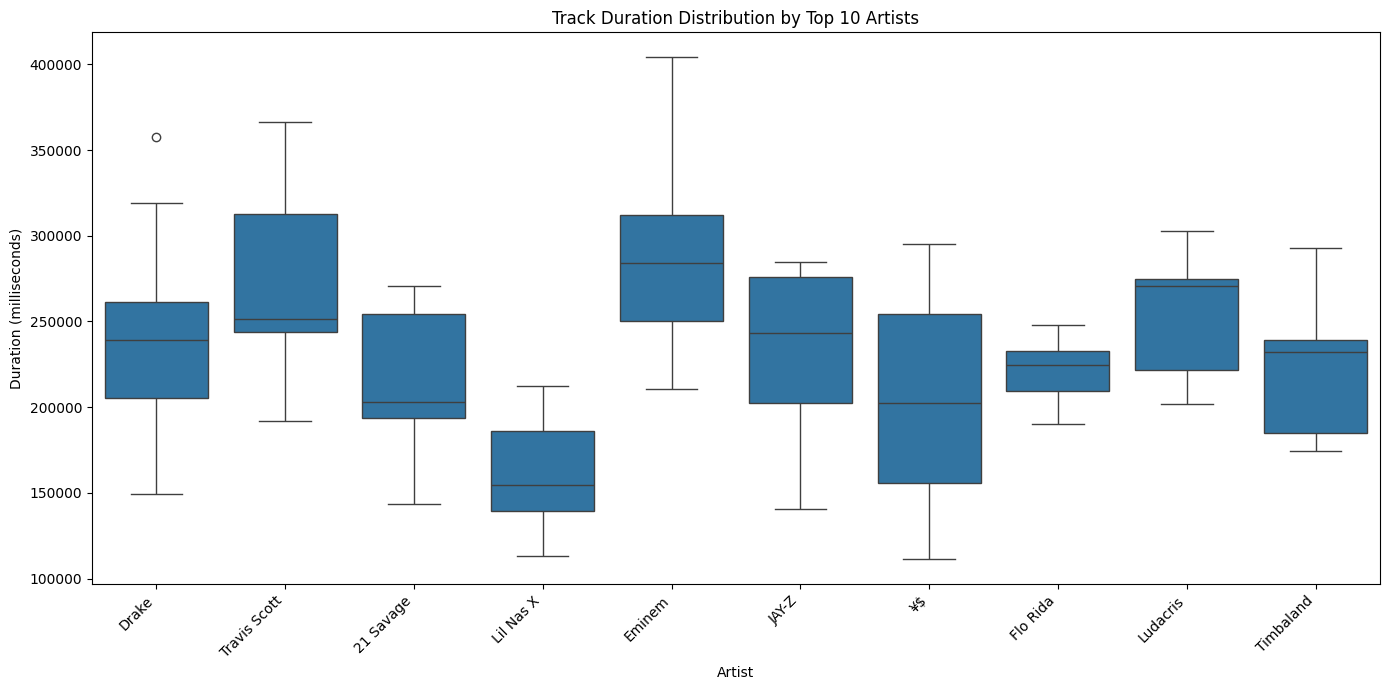

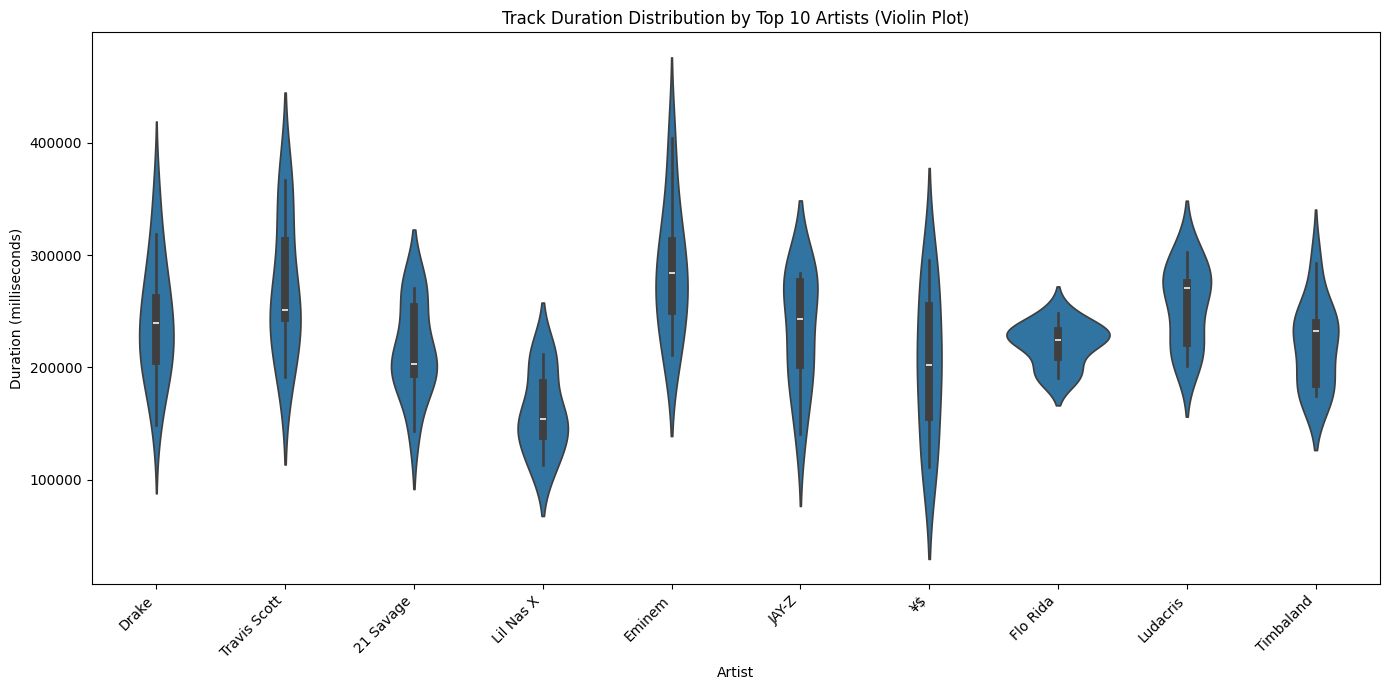

In [13]:
# Q9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot

# Identify top 10 artists by track count to make the plot manageable
top_10_artists = df['artist'].value_counts().head(10).index.tolist()
df_top_10_artists = df[df['artist'].isin(top_10_artists)]

duration_col = 'duration_(ms)' if 'duration_(ms)' in df.columns else ('duration_ms' if 'duration_ms' in df.columns else None)

if duration_col:
    plt.figure(figsize=(14, 7))
    sns.boxplot(data=df_top_10_artists, x='artist', y=duration_col)
    plt.title('Track Duration Distribution by Top 10 Artists')
    plt.xlabel('Artist')
    plt.ylabel('Duration (milliseconds)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Optional: Violin plot for a richer distribution view
    plt.figure(figsize=(14, 7))
    sns.violinplot(data=df_top_10_artists, x='artist', y=duration_col)
    plt.title('Track Duration Distribution by Top 10 Artists (Violin Plot)')
    plt.xlabel('Artist')
    plt.ylabel('Duration (milliseconds)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Duration column not found in the dataset.")

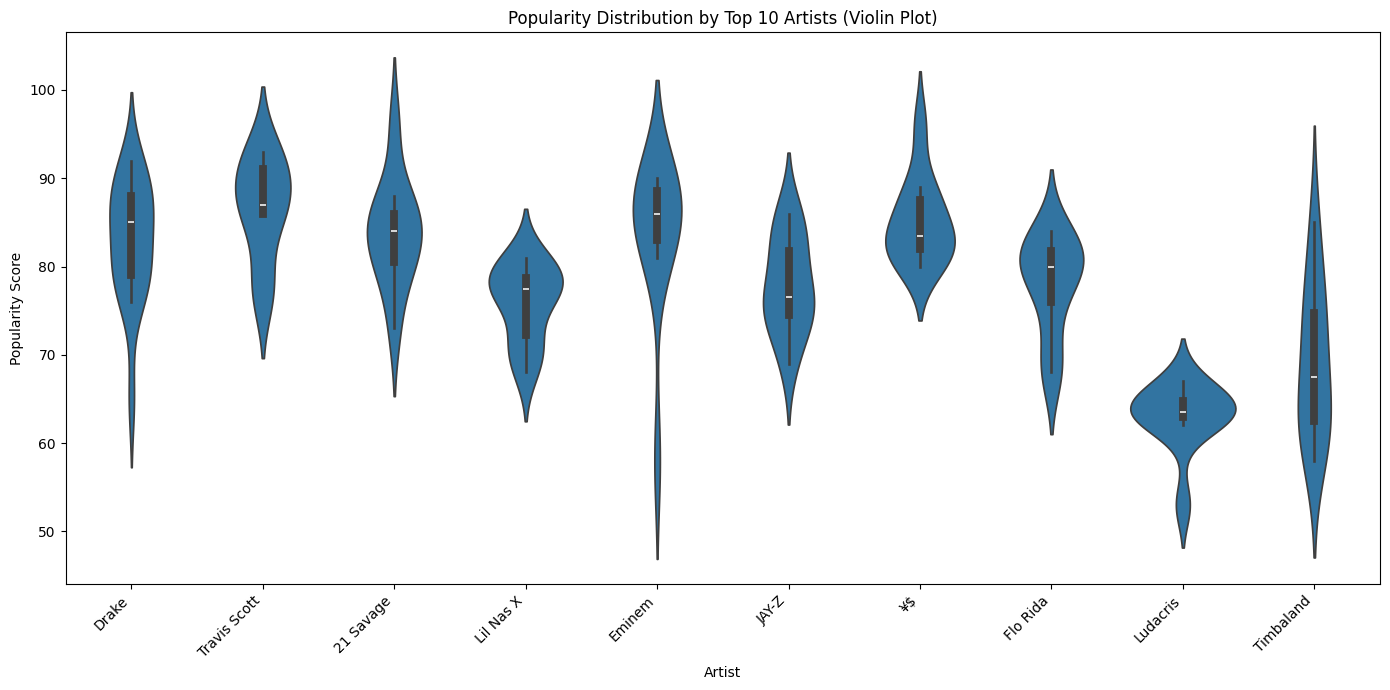

In [14]:
# Q10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot

# Re-use the top 10 artists by track count to make the plot manageable
top_10_artists = df['artist'].value_counts().head(10).index.tolist()
df_top_10_artists = df[df['artist'].isin(top_10_artists)]

plt.figure(figsize=(14, 7))
sns.violinplot(data=df_top_10_artists, x='artist', y='popularity')
plt.title('Popularity Distribution by Top 10 Artists (Violin Plot)')
plt.xlabel('Artist')
plt.ylabel('Popularity Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Optional: Swarm plot for individual data points (can be very dense for many points)
# plt.figure(figsize=(14, 7))
# sns.swarmplot(data=df_top_10_artists, x='artist', y='popularity', size=3)
# plt.title('Popularity Distribution by Top 10 Artists (Swarm Plot)')
# plt.xlabel('Artist')
# plt.ylabel('Popularity Score')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()